<a href="https://colab.research.google.com/github/sungkim11/forecast/blob/master/4_1_Create_Forecast_using_Python___LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science for Business Users

## Forecasting Part 4.1 - Create Forecast using Python - LSTM

#### Author:&emsp;&emsp;Sung Kim
#### Date:&emsp;&emsp;&emsp;January 15, 2019
#### Version:&emsp;&emsp;0.1
#### Revisions:&emsp;
* 0.1. Initial version

_This tutorial was created to democratize data science for business users (i.e., minimize usage of advanced mathematics topics) and alleviate personal frustration we have experienced on following tutorials and struggling to apply that same tutorial for our needs. Considering this, our mission is as follows:_
* _Provide practical application of data science tasks with minimal usage of advanced mathematical topics_
* _Only use a full set of data, which are similar to data we see in business environment and that are publicly available in a tutorial, instead of using simple data or snippets of data used by many tutorials_
* _Clearly state the prerequisites at beginning of the tutorial.  We will try to provide additional information on those prerequisites_
* _Provide both written tutorial and video tutorial on each topic to ensure all steps are easy to follow and clearly illustrated_

### 1. Description

This is multi-part series on how to create a forecast, using one of the most widely used data science tool - Python.

Forecasting is the process of making predictions of the future based on past and present data and its trends.  The accuracy of forecast decreases as you stretch out your forecast. For example, if you are forecasting monthly sales then accuracy of forecast for month 1 sales of forecast will be higher than month 2 sales of forecast and so on. One of my co-workers likes to state that best way to predict tomorrow's weather is to assume it is similar to today's weather. Everything else is just a guess.

Forecasting Series consists of:
* Part 1.1 - Create Forecast using Excel 2016/2019
* Part 1.2 - Fine-Tune Forecast using Excel 2016/2019
* Part 2.1 - Create Forecast using Python - ARIMA
* Part 2.2 - Fine-Tune Forecast using Python - ARIMA
* Part 2.3 - Extend Forecast (Python) to include What-If Analysis Capabilities - ARIMA
* Part 3.1 - Create Forecast using Python - Prophet
* Part 3.2 - Fine-Tune Forecast using Python - Prophet
* Part 3.3 - Extend Forecast (Python) to include What-If Analysis Capabilities - Prophet
* __Part 4.1 - Create Forecast using Python - LSTM__
* Part 4.2 - Fine-Tune Forecast using Python - LSTM
* Part 4.3 - Extend Forecast (Python) to include What-If Analysis Capabilities - LSTM

Unlike both ARIMA and Prophet, which are purpose built algorithms and tool for forecasting, respectively. LSTM is an architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have ‘short term memory’ in that they use persistent previous information to be used in the current neural network. Essentially, the previous information is used in the present task. That means we do not have a list of all of the previous information available for the neural node.

LSTM introduces long-term memory into recurrent neural networks. It mitigates the vanishing gradient problem, which is where the neural network stops learning because the updates to the various weights within a given neural network become smaller and smaller. It does this by using a series of ‘gates’. These are contained in memory blocks which are connected through layers.

There are three types of gates within a unit:

* Input Gate: Scales input to cell (write)
* Output Gate: Scales output to cell (read)
* Forget Gate: Scales old cell value (reset)

Each gate is like a switch that controls the read/write, thus incorporating the long-term memory function into the model.

There are a huge range of ways that LSTM can be used, including:

* Handwriting recognition
* Time series anomaly detection
* Time series forecasting
* Speech recognition
* Learning grammar
* Composing music

### 2. Prerequisites

Following are prerequisite software for this tutorial:

    - [x] Python (Download Anaconda Python from here => https://www.anaconda.com/download/ and install on your computer.)
    - [x] Python Package: tensorflow (Install using "conda install tensorflow" in your Anaconda Prompt). All other python packages used in this tutorial comes with Anaconda Python. 
    
or you can just use Google Colab like I am doing now with this notebook => https://colab.research.google.com/

Following are prerequisite knowledge for this tutorial:

    - [x] Create Forecast Using Excel 2016/2019 tutorial
    - [x] Basic knowledge Python (You really do not need to be expert in python to use python for data science tasks. Many data scientists supplement their basic knowledge of python with google :-) to complete their tasks. We will provide a tutorial soon...
    - [x] Basic knowledge installing Python packages (Good news is that Anaconda simplifies this for you somewhat, but they only have limited selection of packages you may need - e.g., pmdarima, which is used in this tutorial cannot be installed using this method). We will provide a tutorial soon...
    - [x] Basic knowledge Jupyter Notebook/Lab (Good news is that Jupyter Notebook/Lab is easy to use and learn). We will provide a tutorial soon...
    - [x] Basic knowledge Pandas (Pandas is data analysis tools for the Python programming language. This is one of the tool where more you know will make your job easier and there is always google :-). We will provide a tutorial soon...
    - [x] Basic knowledge statistical data visualization tool, such as matplotlib, seaborn, bokeh, or plotly (These are data visualization tool for the Python programming language. These are a set of the tool where more you know will make your job easier and there is always google :-). We will provide a tutorial soon...
    - [x] Historical data with same frequency (e.g., hourly, daily, weekly, monthly, quarterly, yearly, etc.), to create a forecast. This is important since you cannot create a forecast without historical data that does not have same frequency. If your data does not follow same frequency, then aggregate your data so it will be same frequency. For example, if your data consists of any random two days per week then aggregate (i.e., sum up those two days) your data into a weekly data then create a forecast using aggregated data.

### 3. Steps

Please follow the step by step instructions, which is divided into 10 major steps as shown below:
* Get Data
* Format Data
* Import Data
* Cleanse Data
* Analyze Data
* Prep Data
* Develop and Validate Forecast Model
* Maintain Forecast Model

#### 3.1. Get Data

United Stated Census Bureau maintains Monthly Retail Trade Report, from January 1992 to Present. This data was picked to illustrate forecasting because it has extensive historical data with same monthly frequency. Data is available as Excel spreadsheet format at https://www.census.gov/retail/mrts/www/mrtssales92-present.xls 

3.1.1. Click on the link to save Excel spreadsheet to your local directory/folder.

3.1.2. Open the Excel spreadsheet (i.e., Monthly Trade Report).

3.1.3. Monthly Retail Trade Report is organized by year where each year from 1992 to 2018 are separated by worksheet. Within each worksheet, there are two different types of figures - not adjusted and adjusted. For each type, there is summary set of figures followed by more detailed figure, organized by NAICS Code (i.e., North American Industry Classification System - the standard used by Federal statistical agencies in classifying business establishments for the purpose of collecting, analyzing, and publishing statistical data related to the U.S. business economy.).

#### 3.2. Format Data

We will need to format the data in Monthly Trade Report, so we can create a forecast from consolidated multiple years of data. At the same time, this data is bit more extensive then we would like, so we will be filtering data as follow:
* Use January 2005 to Present time to ensure cyclic behavior (full economic cycle with boom and recession) is represented in our data
* Use "NOT ADJUSTED" data as illustrated on cell line 7 to line 12 on the spreadsheet.  Other data is nice, but it is bit much for our needs

3.2.1. Insert a new worksheet, entitled "Forecast".

3.2.2. Copy and paste data from 2005 worksheet into "Forecast" worksheet.  When pasting data, use "Transpose" option on Paste.  It is easier to scroll up and down then scroll sideway to see the data.

3.2.3. Repeat the step 3.2.2 for 2006 thru 2018.

3.2.4. Copy and paste column label at top of pasted data.  Again when pasting data, use "Transpose" option on paste.

3.2.5. Insert date column at left of pasted data, start with 01/01/2005 on first row then 02/01/2005 on second row then fill the rows with date.  The end date should be 10/01/2018.

3.2.6. Save the spreadsheet as mrtssales92-present_step2.xlsx.

#### 3.3. Import Data

Unlike Excel, which is all in one application, you will need to import data into python - specifically pandas (Python Data Analysis Library), which is python's in-memory database where you can perform data analysis and modeling.

3.3.1. Export Excel data to CSV file

3.3.1.1. Open Excel worksheet, entitled "mrtssales92-present_step2.xlsx".

3.3.1.2. Navigate to "Forecast" worksheet and convert all numbers to just number - e.g., 330000 instead of 330,000.  Since 330000 is imported as number and 330,000 is imported as text.  It is easier this way. Otherwise, you will need to programatically change data type.

3.3.1.3. Extend the date that currently ends on 10/1/2018 to 12/1/2020 since we will be creating forecast to December 2020.

3.3.1.4. Save the worksheet as CSV file format, entitled "mrtssales92-present_step3.csv".

3.3.3. Import Python Packages

Best analogy of Python as programming language is that of smart phone. Python is great programming language where you can accomplish a lot of tasks, just like brand new smart phone.  Just like brand new smart phone, it is bit limited since it can only accomplish basic tasks without apps that excels at special tasks, such as Google Map. Python packages are similar to smart phone apps where these packages can accomplish specific tasks very well, such as pandas.

3.3.3.1. Install pmdarima python package

In [89]:
!pip install tensorflow

3.3.3.2. Import python packages so python can use them and show its version. Showing version is important since it will enable other users to replicate your work using same python version and python packages version.

In [90]:
import pandas as pd
import matplotlib as plt
import tensorflow as tf
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
import platform
import numpy as np
import sklearn
from sklearn.metrics import mean_squared_error
import statsmodels
import keras

from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [91]:
print('Python: ', platform.python_version())
print('pandas: ', pd.__version__)
print('matplotlib: ', plt.__version__)
print('Tensorflow: ', tf.__version__)
print('statsmodels: ', statsmodels.__version__)
print('NumPy: ', np.__version__)
print('sklearn: ', sklearn.__version__)
print('statsmodels: ', statsmodels.__version__)
print('keras: ', keras.__version__)

Python:  3.6.9
pandas:  1.0.5
matplotlib:  3.2.2
Tensorflow:  2.3.0
statsmodels:  0.10.2
NumPy:  1.18.5
sklearn:  0.22.2.post1
statsmodels:  0.10.2
keras:  2.4.3


Very short explanation of python packages:
* pandas: data analysis tool
* matplotlib: data visualization tool
* Tensorflow: The core open source library to help you develop and train ML models.
* statsmodels: statistical models tool
* numpy: scientific computing tool
* sklearn - machine learning

3.3.4. Import data from newly created CSV file and specify that date column is index column.

In [92]:
#Upload file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

#Assign uploaded file to pandas
monthly_retail_data = pd.read_csv(fn, index_col = 0)

Saving mrtssales92-present_part3_3.csv to mrtssales92-present_part3_3 (1).csv
User uploaded file "mrtssales92-present_part3_3.csv" with length 9426 bytes


3.3.5. Validate data is imported correctly

As shown below, date column is imported as index and all other columns are imported as number.

In [93]:
monthly_retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 1/1/2005 to 12/1/2020
Data columns (total 6 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Retail and food services sales, total                                              166 non-null    float64
 1   Retail sales and food services excl motor vehicle and parts                        166 non-null    float64
 2   Retail sales and food services excl gasoline stations                              166 non-null    float64
 3   Retail sales and food services excl motor vehicle and parts and gasoline stations  166 non-null    float64
 4   Retail sales, total                                                                166 non-null    float64
 5   Retail sales, total (excl. motor vehicle and parts dealers)                        166 non-null    

You can also display imported data.

In [94]:
monthly_retail_data

,"Retail and food services sales, total",Retail sales and food services excl motor vehicle and parts,Retail sales and food services excl gasoline stations,Retail sales and food services excl motor vehicle and parts and gasoline stations,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)"
Month,,,,,,
1/1/2005,293261.0,231325.0,267695.0,205759.0,263469.0,201533.0
2/1/2005,295062.0,228117.0,270080.0,203135.0,265320.0,198375.0
3/1/2005,339141.0,258532.0,309761.0,229152.0,306384.0,225775.0
4/1/2005,335632.0,257963.0,305083.0,227414.0,302054.0,224385.0
5/1/2005,345348.0,267021.0,314197.0,235870.0,311292.0,232965.0
...,...,...,...,...,...,...
8/1/2020,NaN,NaN,NaN,NaN,NaN,NaN
9/1/2020,NaN,NaN,NaN,NaN,NaN,NaN
10/1/2020,NaN,NaN,NaN,NaN,NaN,NaN


Notes:  There are no numbers after November 2018, which is displayed as NaN, which is just missing values. This makes sense since those dates were created as placeholder for forecast.

3.3.6. Convert the index to date. Index needs to be datetime, which is required for time series data.

In [95]:
monthly_retail_data.index = pd.to_datetime(monthly_retail_data.index)

3.3.7. Validate that index has been converted to date where Index has been converted to DatetimeIndex

In [96]:
monthly_retail_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 2005-01-01 to 2020-12-01
Data columns (total 6 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Retail and food services sales, total                                              166 non-null    float64
 1   Retail sales and food services excl motor vehicle and parts                        166 non-null    float64
 2   Retail sales and food services excl gasoline stations                              166 non-null    float64
 3   Retail sales and food services excl motor vehicle and parts and gasoline stations  166 non-null    float64
 4   Retail sales, total                                                                166 non-null    float64
 5   Retail sales, total (excl. motor vehicle and parts dealers)                        166 n

#### 3.4. Cleanse Data

After data has been formatted, we will need to cleanse data. There is a truism in saying that Garbage in Garbage out. Simple thing like if all numbers are stored as number needs to be checked. 

3.4.1.  Cleanse Data.  Ensure all numbers are stored as number, not text.  Same applies to both date and text.  In addition, ensure all numbers, dates and text are consistent. For example, the number is not stored as number, but as text - for example 121K instead of 121,000.  You will need to cleanse the data to ensure all numbers are stored as number. Imported Monthly Trade Report does not seem to have any dirty data, so this step is not need.

#### 3.5. Analyze Data

After data has been imported, we will be analyzing data to look for some specific items. Those items are:
* Missing Data. It would be nice to have all data filled-in, but in real-life that is not always the case.  We will need to identify all missing data and denote as such.
* Outliers. Outliers happens.  It would be nice to include them, but it will skew our forecast without additional benefits.  We will need to identify all outliers and denote as such.
* Seasonality.  It is a characteristic of data in which data experiences regular and predictable changes which occur every year.  This is important since if the historical data has seasonality then our forecast also needs to reflect this seasonality.
* Cyclic Behavior.  It takes place when there are regular fluctuations in the data which usually last for an interval of at least two years, such as economic recession or economic boom. 

##### 3.5.1. Missing Data

Formatted Monthly Trade Report seems to be fully populated, so this step is not need.

#####  3.5.2. Outliers

Simplest way to detect outliers is to create a line chart of the data as shown below since the data points are limited in scope. Formatted Monthly Trade Report seems to be consistent from year to year, so this step is not need.

#####  3.5.3. Seasonality

Simplest way to detect seasonality is to create a line chart for each of labeled data. Seasonality analysis will be shown below for each sales data.

##### 3.5.4. Cyclic Behavior

Simplest way to detect if the data reflects cyclic behavior is to create a line chart for each of sales data. As you can see, the data reflects cyclic behavior where there was economic boom between 2005 thru 2006, followed by economic recession between 2007 thru 2009, followed by gradual increase in sales figure between 2010 thru 2015 then economic boom from 2016 to present. Cyclic Behavior analysis will be shown below for each sales data.

##### 3.5.5. Filter the data to only historical or actuals since it does not make sense to analyze empty data.

In [97]:
monthly_retail_actuals = monthly_retail_data.loc['2005-01-01':'2018-10-01']

##### 3.5.6. Configure chart

We will be setting chart size here since default chart is bit too small.

In [98]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

##### 3.5.7. Retail and food services sales, total

3.5.7.1. Chart Retail and food services sales, total

Now, let's chart the data. We cannot create a chart using index column so we will be temporarily removing date index before creating line chart with grid.  You can create pretty charts with python, but this will do for now.

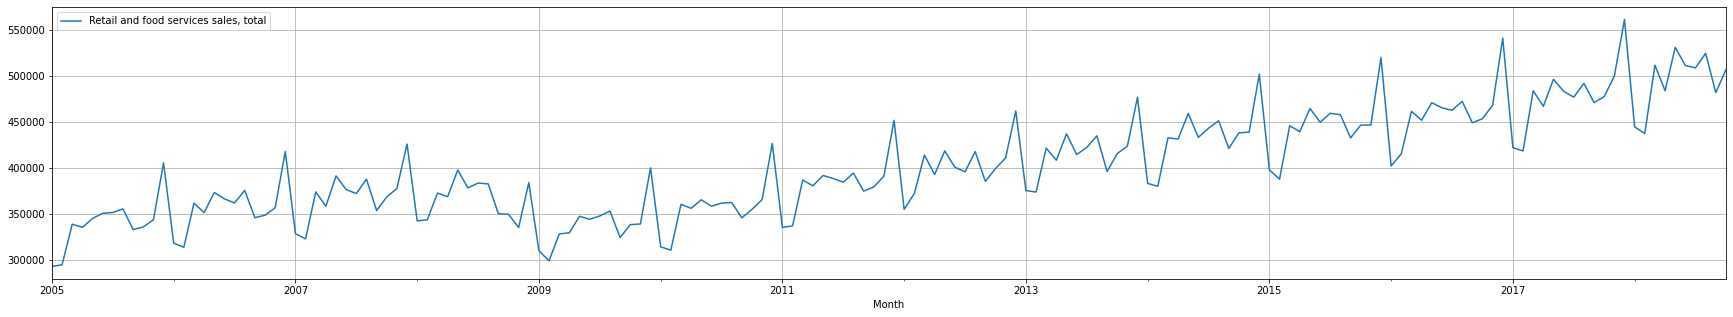

In [99]:
monthly_retail_actuals.reset_index().plot(x='Month', y='Retail and food services sales, total', kind='line', grid=1)
plt.pyplot.show()

Convert the index back to date again

In [100]:
monthly_retail_actuals.index = pd.to_datetime(monthly_retail_actuals.index)

3.5.7.2. Decompose Retail and food services sales, total time series data

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem. It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model. Multiplicative model was chosen since changes increase or decrease over time whereas Additive model changes over time are consistently made by the same amount.

We can see that the trend and seasonality information extracted from the Retail and food services sales, total data does seem consistent with observed data. The residuals seems interesting where variability shows high variability in 2008/2009 (i.e., Great Recession) and in 2012 (Not sure what happended in 2012 - maybe start of booming economy).

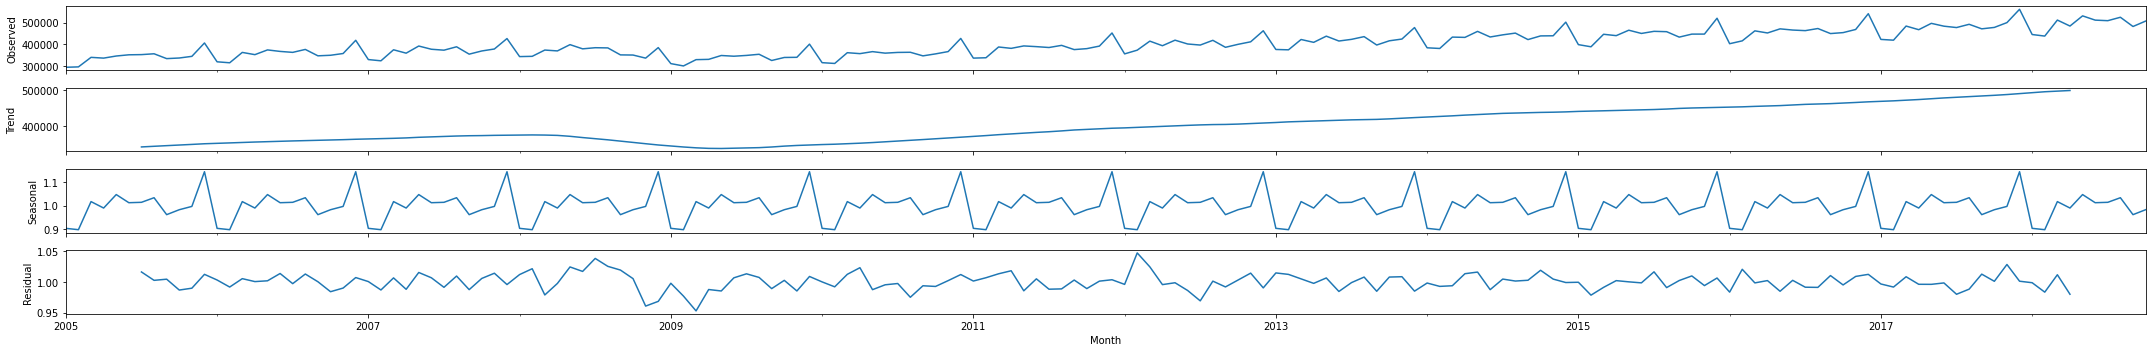

In [101]:
Retail_and_food_services_sales_total_decompose_result = seasonal_decompose(monthly_retail_actuals['Retail and food services sales, total'], model='multiplicative')
Retail_and_food_services_sales_total_decompose_result.plot()
plt.pyplot.show()

##### 3.5.8. Retail sales and food services excl motor vehicle and parts

3.5.8.1. Chart Retail sales and food services excl motor vehicle and parts

We cannot create a chart using index column so we will be temporaily removing date index before creating line chart with grid.  You can create really pretty chart with python, but this will do for now.

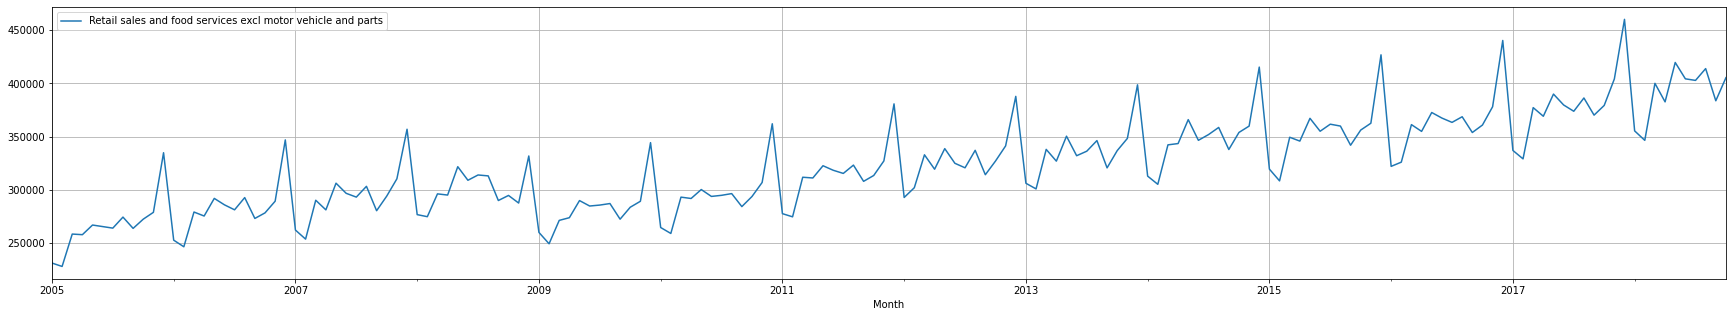

In [102]:
monthly_retail_actuals.reset_index().plot(x='Month', y='Retail sales and food services excl motor vehicle and parts', kind='line', grid=1)
plt.pyplot.show()

Convert the index to date again

In [103]:
monthly_retail_actuals.index = pd.to_datetime(monthly_retail_actuals.index)

3.5.8.2. Decompose Retail sales and food services excl motor vehicle and parts time series data

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem. It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model. Multiplicative model was chosen since changes increase or decrease over time whereas Additive model changes over time are consistently made by the same amount.

We can see that the trend and seasonality information extracted from the Retail and food services sales, total data does seem consistent with observed data. The residuals seems interesting where variability shows high variability in 2008/2009 (i.e., Great Recession) and in 2012 (Not sure what happended in 2012 - maybe start of booming economy).

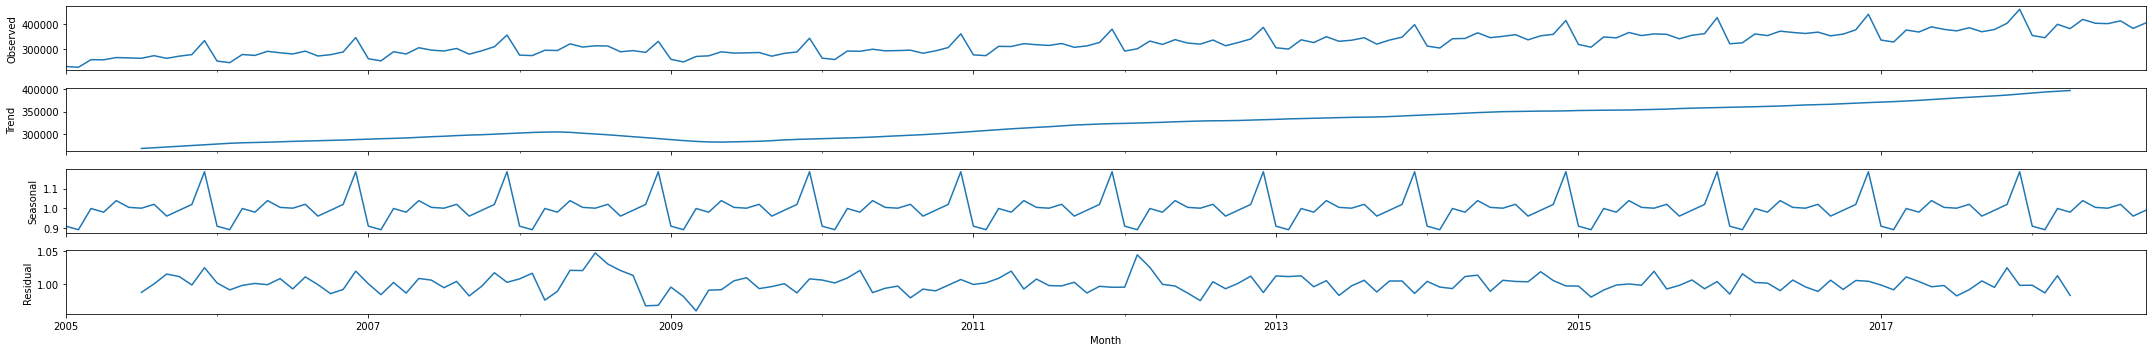

In [104]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_decompose_result = seasonal_decompose(monthly_retail_actuals['Retail sales and food services excl motor vehicle and parts'], model='multiplicative')
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_decompose_result.plot()
plt.pyplot.show()

##### 3.5.9. Retail sales and food services excl gasoline stations

3.5.9.1. Chart Retail sales and food services excl gasoline stations

We cannot create a chart using index column so we will be temporarily removing date index before creating line chart with grid.  You can create really pretty chart with python, but this will do for now.

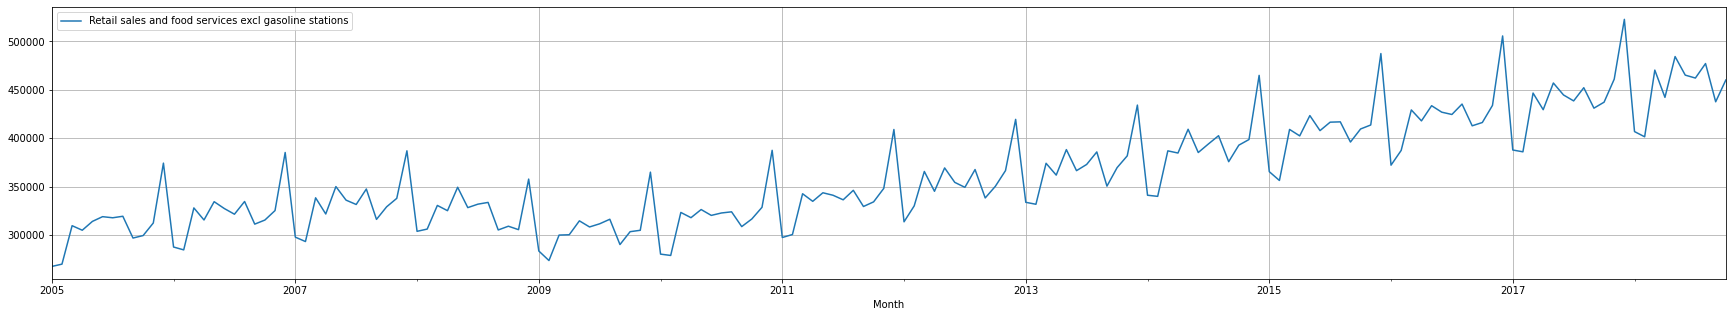

In [105]:
monthly_retail_actuals.reset_index().plot(x='Month', y='Retail sales and food services excl gasoline stations', kind='line', grid=1)
plt.pyplot.show()

Convert the index to date again

In [106]:
monthly_retail_actuals.index = pd.to_datetime(monthly_retail_actuals.index)

3.5.9.2. Decompose Retail sales and food services excl gasoline stations time series data

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem. It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model. Multiplicative model was chosen since changes increase or decrease over time whereas Additive model changes over time are consistently made by the same amount.

We can see that the trend and seasonality information extracted from the Retail and food services sales, total data does seem consistent with observed data. The residuals seems interesting where variability shows high variability in 2008/2009 (i.e., Great Recession) and in 2012 (Not sure what happended in 2012 - maybe start of booming economy).

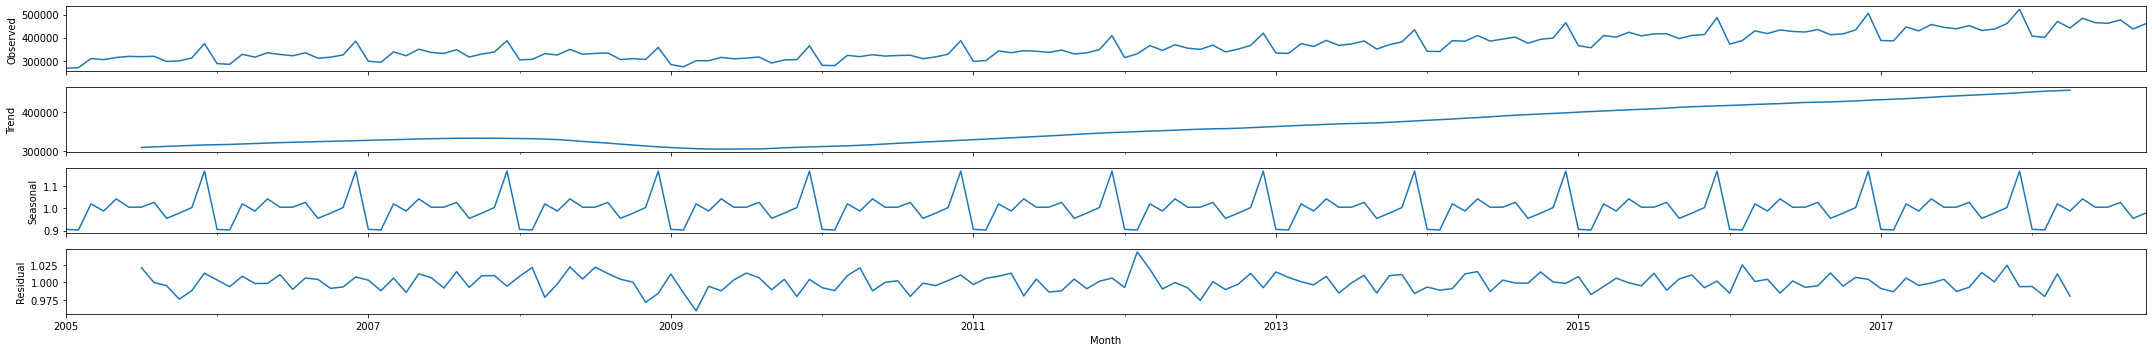

In [107]:
Retail_sales_and_food_services_excl_gasoline_stations_decompose_result = seasonal_decompose(monthly_retail_actuals['Retail sales and food services excl gasoline stations'], model='multiplicative')
Retail_sales_and_food_services_excl_gasoline_stations_decompose_result.plot()
plt.pyplot.show()

##### 3.5.10. Retail sales and food services excl motor vehicle and parts and gasoline stations

3.5.10.1. Chart Retail sales and food services excl motor vehicle and parts and gasoline stations

We cannot create a chart using index column so we will be temporarily removing date index before creating line chart with grid.  You can create really pretty chart with python, but this will do for now.

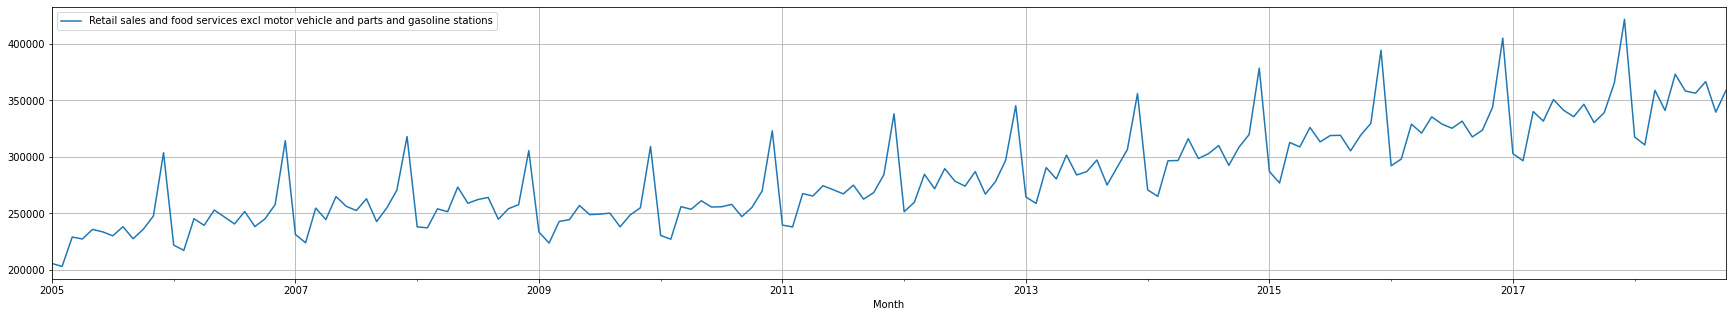

In [108]:
monthly_retail_actuals.reset_index().plot(x='Month', y='Retail sales and food services excl motor vehicle and parts and gasoline stations', kind='line', grid=1)
plt.pyplot.show()

Convert the index to date again

In [109]:
monthly_retail_actuals.index = pd.to_datetime(monthly_retail_actuals.index)

3.5.10.2. Decompose Retail sales and food services excl motor vehicle and parts and gasoline stations time series data

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem. It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model. Multiplicative model was chosen since changes increase or decrease over time whereas Additive model changes over time are consistently made by the same amount.

We can see that the trend and seasonality information extracted from the Retail and food services sales, total data does seem consistent with observed data. The residuals seems interesting where variability shows high variability in 2008/2009 (i.e., Great Recession) and in 2012 (Not sure what happended in 2012 - maybe start of booming economy).

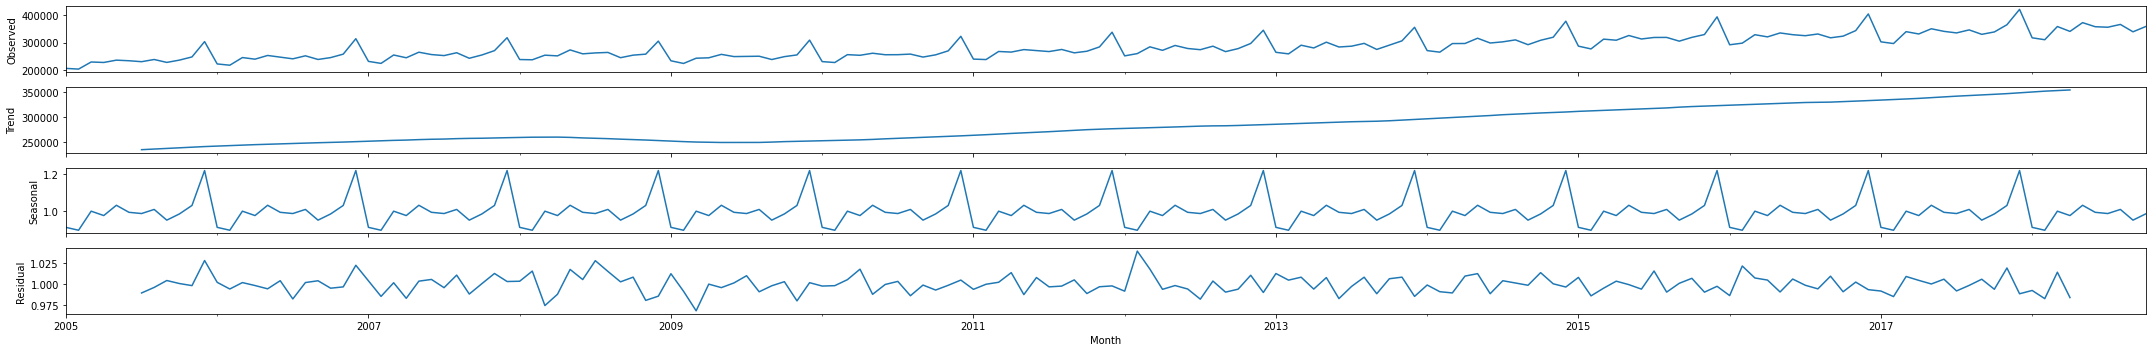

In [110]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_decompose_result = seasonal_decompose(monthly_retail_actuals['Retail sales and food services excl motor vehicle and parts and gasoline stations'], model='multiplicative')
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_decompose_result.plot()
plt.pyplot.show()

##### 3.5.11. Retail sales, total

3.5.11.1. Chart Retail sales, total

We cannot create a chart using index column so we will be temporarily removing date index before creating line chart with grid.  You can create really pretty chart with python, but this will do for now.

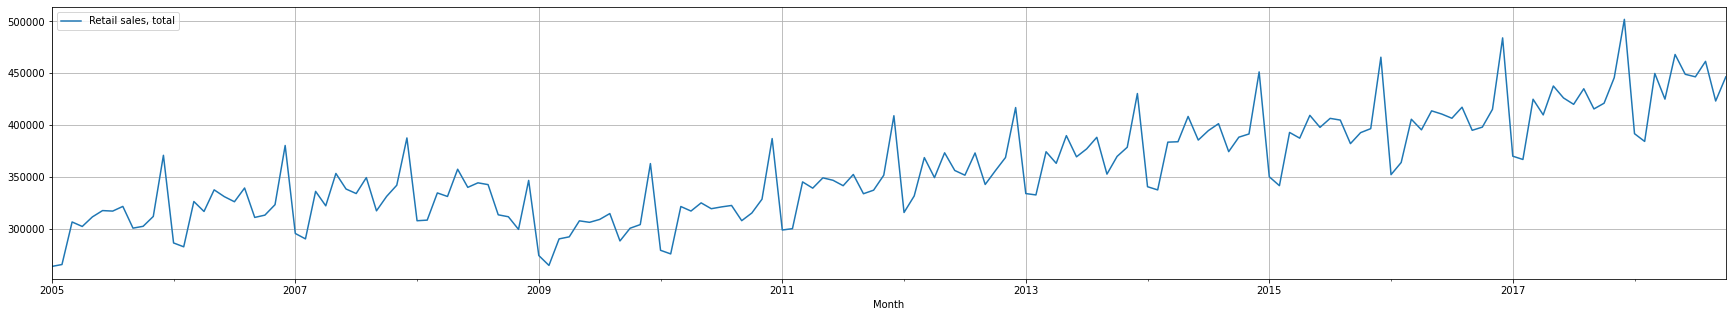

In [111]:
monthly_retail_actuals.reset_index().plot(x='Month', y='Retail sales, total', kind='line', grid=1)
plt.pyplot.show()

Convert the index to date again

In [112]:
monthly_retail_actuals.index = pd.to_datetime(monthly_retail_actuals.index)

3.5.11.2. Decompose Retail sales, total time series data

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem. It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model. Multiplicative model was chosen since changes increase or decrease over time whereas Additive model changes over time are consistently made by the same amount.

We can see that the trend and seasonality information extracted from the Retail and food services sales, total data does seem consistent with observed data. The residuals seems interesting where variability shows high variability in 2008/2009 (i.e., Great Recession) and in 2012 (Not sure what happended in 2012 - maybe start of booming economy).

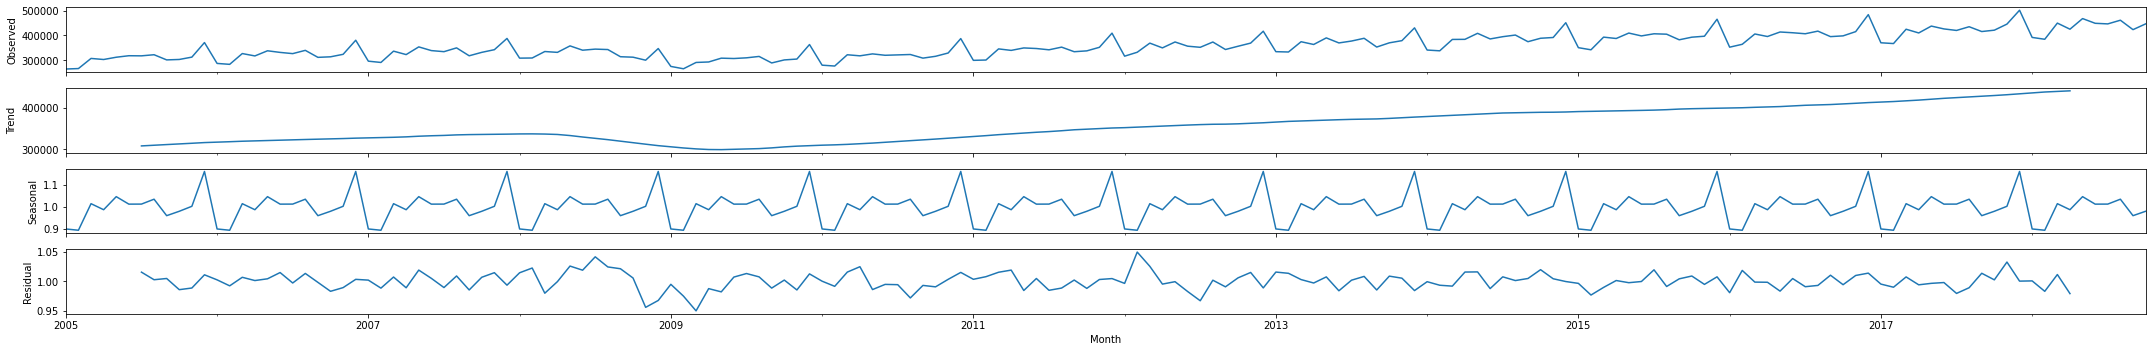

In [113]:
Retail_sales_total_decompose_result = seasonal_decompose(monthly_retail_actuals['Retail sales, total'], model='multiplicative')
Retail_sales_total_decompose_result.plot()
plt.pyplot.show()

##### 3.5.12. Retail sales, total (excl. motor vehicle and parts dealers)

3.5.12.1. Chart Retail sales, total (excl. motor vehicle and parts dealers)

We cannot create a chart using index column so we will be temporaily removing date index before creating line chart with grid.  You can create really pretty chart with python, but this will do for now.

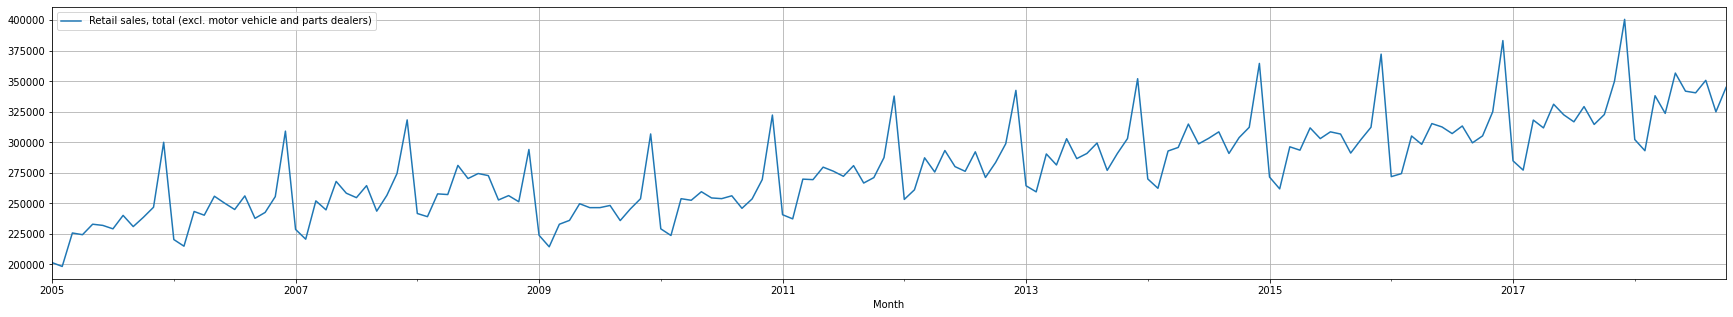

In [114]:
monthly_retail_actuals.reset_index().plot(x='Month', y='Retail sales, total (excl. motor vehicle and parts dealers)', kind='line', grid=1)
plt.pyplot.show()

Convert the index to date again

In [115]:
monthly_retail_actuals.index = pd.to_datetime(monthly_retail_actuals.index)

3.5.12.2. Decompose Retail sales, total (excl. motor vehicle and parts dealers) time series data

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem. It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model. Multiplicative model was chosen since changes increase or decrease over time whereas Additive model changes over time are consistently made by the same amount.

We can see that the trend and seasonality information extracted from the Retail and food services sales, total data does seem consistent with observed data. The residuals seems interesting where variability shows high variability in 2008/2009 (i.e., Great Recession) and in 2012 (Not sure what happended in 2012 - maybe start of booming economy).

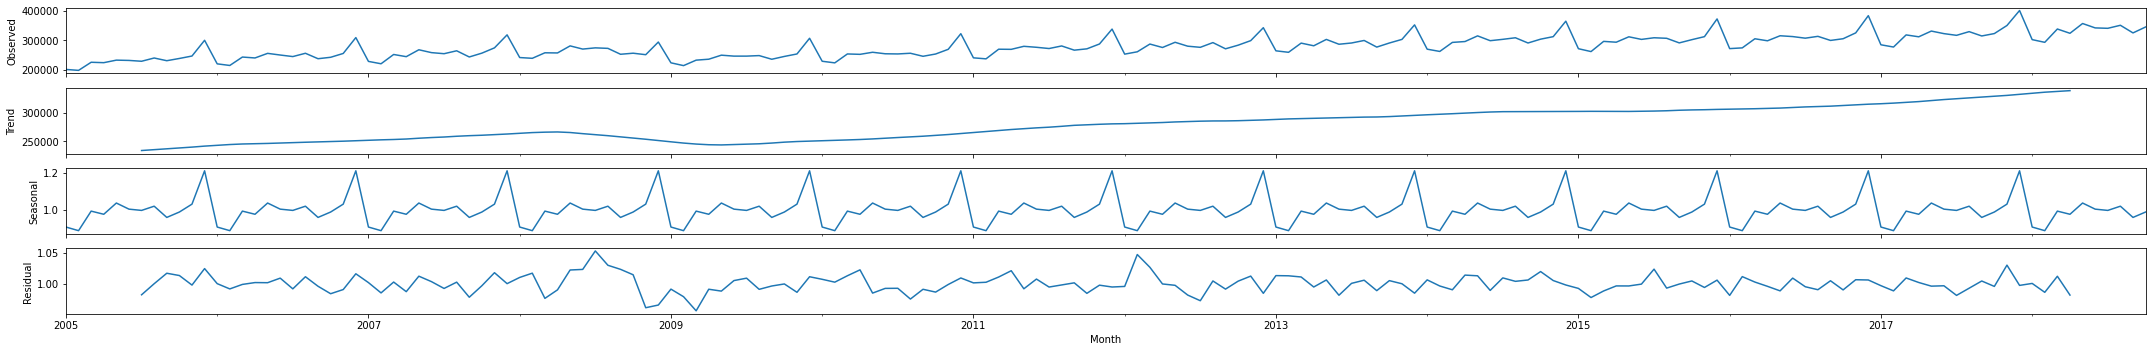

In [116]:
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_decompose_result = seasonal_decompose(monthly_retail_actuals['Retail sales, total (excl. motor vehicle and parts dealers)'], model='multiplicative')
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_decompose_result.plot()
plt.pyplot.show()

#### 3.6. Prep Data

We will need to prep data to ensure we only use clean data to create our forecast.  Some of the basic data prep tasks are:
* Remove data outliers. Let say for one month, your sales doubled or tripled due to once in lifetime promotion. This is nice data point to consider, but it will skew our forecast without providing any value. We will need to cap and floor our data to ensure outliers are removed.
* Impute missing data. Sometimes, some of the data are just missing for whatever the reason. If the percentage of missing value is low, then you can impute that missing data.

Monthly Trade Report does not seem to have any outliers nor missing data, so this step is not need.

#### 3.7. Develop and Validate Forecast Model

To create a forecast model, we shall use LSTM to forecast growth. 

##### 3.7.1. Retail and food services sales, total

3.7.1.1. Filter Monthly Retail Data to just Retail and food services sales, total data

In [117]:
Retail_and_food_services_sales_total_data = monthly_retail_actuals.filter(items=['Retail and food services sales, total'])

In [118]:
print('All: ', Retail_and_food_services_sales_total_data.shape)

All:  (166, 1)


3.7.1.2. Split the data into Train and Test data

We will be diving data into three sets of data:
* Train Data
* Test Data

Usually we use 70 Train/30 Test (70/30) split, 80 Train/20 Test (80/20) split, 90 Train/10 Test (90/10) split or even 95 Train/5 Test (95/5) where train data is used to create a forecast and test data is used to validate the forecast, but for simplification purposes, we will split the data as follows:
* Train Data: January 2005 thru December 2016
* Test Data: January 2017 thru October 2018

In [119]:
Retail_and_food_services_sales_total_train = Retail_and_food_services_sales_total_data.loc['2005-01-01':'2016-12-01']
Retail_and_food_services_sales_total_test = Retail_and_food_services_sales_total_data.loc['2017-01-01':]

Validate data split was done correctly

In [120]:
print( 'Train: ', Retail_and_food_services_sales_total_train.shape)
print( 'Test: ', Retail_and_food_services_sales_total_test.shape)

Train:  (144, 1)
Test:  (22, 1)


3.7.1.3. Tranform data from real number to range of numbers between 0 and 1 (i.e., scaled numbers).

Many machine learning algorithms, such as neural networks, regression-based algorithms, K-nearest neighbors, support vector machines with radial bias kernel functions, principal components analysis, and algorithms using linear discriminant analysis don't perform as well if the features are not on relatively similar scales.

Tip:
* Use MinMaxScaler as your default
* Use RobustScaler if you have outliers and can handle a larger range
* Use StandardScaler if you need normalized features
* Use Normalizer sparingly - it normalizes rows, not columns

In [121]:
scaler = MinMaxScaler()
scaler.fit(Retail_and_food_services_sales_total_train)
Retail_and_food_services_sales_total_train_scaled = scaler.transform(Retail_and_food_services_sales_total_train)
Retail_and_food_services_sales_total_test_scaled = scaler.transform(Retail_and_food_services_sales_total_test)

Validate scaling was done correctly

Please note that all values are between 0 and 1.

In [122]:
Retail_and_food_services_sales_total_train_scaled

array([[0.        ],
       [0.00726705],
       [0.18512615],
       [0.17096731],
       [0.21017145],
       [0.23275539],
       [0.23631426],
       [0.25194588],
       [0.16151329],
       [0.17299289],
       [0.20391719],
       [0.45332101],
       [0.10202517],
       [0.08388781],
       [0.27733415],
       [0.23566866],
       [0.32400709],
       [0.29598396],
       [0.2781815 ],
       [0.33302533],
       [0.21366576],
       [0.22408415],
       [0.25689684],
       [0.50328651],
       [0.14371084],
       [0.12065077],
       [0.32635546],
       [0.26338109],
       [0.39644354],
       [0.33643087],
       [0.31914087],
       [0.38233716],
       [0.24482409],
       [0.30432028],
       [0.34112359],
       [0.53591359],
       [0.19924061],
       [0.20430051],
       [0.32137223],
       [0.30528465],
       [0.42244513],
       [0.34396827],
       [0.36502697],
       [0.36154073],
       [0.23112928],
       [0.22832495],
       [0.17061627],
       [0.367

3.7.1.4. Set parameter values

It is easier to change parameter values in one place, so you can track changes to parameter values and its respective model performance.

In [273]:
#0.021349
#n_inputs = 12
#n_features = 1
#n_batch_size = 2
#n_epochs = 100
#n_units = 400
#n_dropouts = 0.2
#n_predict_validate = 22
#n_predict_predict = 48

In [364]:
n_inputs = 12
n_features = 1
n_batch_size = 1
n_epochs = 100
n_units = 400
n_dropouts = 0.2
n_predict_validate = 22
n_predict_predict = 48

3.7.1.5. Generate input data for the model

Time series data requires preparation before it can be used to train a supervised learning model, such as a deep learning model.

In [365]:
Retail_and_food_services_sales_total_generator = TimeseriesGenerator(Retail_and_food_services_sales_total_train_scaled, Retail_and_food_services_sales_total_train_scaled, length = n_inputs, batch_size = n_batch_size)

3.7.1.6. Develop Model

Please note that the following step takes some time to complete, especially when you increase the n_epochs value.

In [366]:
Retail_and_food_services_sales_total_model = Sequential()
Retail_and_food_services_sales_total_model.add(LSTM(n_units, activation='relu', input_shape=(n_inputs, n_features)))
Retail_and_food_services_sales_total_model.add(Dropout(n_dropouts))
Retail_and_food_services_sales_total_model.add(Dense(1))
Retail_and_food_services_sales_total_model.compile(optimizer='adam', loss='mse')

Retail_and_food_services_sales_total_model.fit_generator(Retail_and_food_services_sales_total_generator, epochs=n_epochs)

Epoch 1/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0237
Epoch 2/100
132/132 [==============================] - 2s 13ms/step - loss: 0.0131
Epoch 3/100
132/132 [==============================] - 2s 13ms/step - loss: 0.0149
Epoch 4/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0139
Epoch 5/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0089
Epoch 6/100
132/132 [==============================] - 2s 13ms/step - loss: 0.0103
Epoch 7/100
132/132 [==============================] - 2s 13ms/step - loss: 0.0081
Epoch 8/100
132/132 [==============================] - 2s 13ms/step - loss: 0.0070
Epoch 9/100
132/132 [==============================] - 2s 13ms/step - loss: 0.0069
Epoch 10/100
132/132 [==============================] - 2s 13ms/step - loss: 0.0063
Epoch 11/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0061
Epoch 12/100
132/132 [==============================] - 2s 13ms/step - loss: 0.0073
E

3.7.1.7. Predict using Model

Predict 22 months of sales using newly generated model.

In [367]:
pred_list = []

batch = Retail_and_food_services_sales_total_train_scaled[-n_inputs:].reshape((1, n_inputs, n_features))

for i in range(n_predict_validate):
    pred_list.append(Retail_and_food_services_sales_total_model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

Convert the scaled numbers back to sales numbers.

In [368]:
Retail_and_food_services_sales_total_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index = Retail_and_food_services_sales_total_test[-n_predict_validate:].index, columns = ['Prediction'])

3.7.1.8. Validate Model

Join test data with 22 months of sales number with predicted data with 22 months of predicted sales number.

In [369]:
Retail_and_food_services_sales_total_validate = pd.concat([Retail_and_food_services_sales_total_test, Retail_and_food_services_sales_total_predict], axis = 1)

In [370]:
Retail_and_food_services_sales_total_validate.tail(22)

,"Retail and food services sales, total",Prediction
Month,,
2017-01-01,422128.0,411758.573726
2017-02-01,418602.0,424295.467196
2017-03-01,483895.0,474282.899135
2017-04-01,467082.0,469340.420550
2017-05-01,496410.0,484046.313287
2017-06-01,483338.0,478132.258695
2017-07-01,476983.0,475985.993348
2017-08-01,492031.0,484867.260447
2017-09-01,471043.0,466221.722427


Plot the difference in actual sales with forecast sales

<Figure size 1440x360 with 0 Axes>

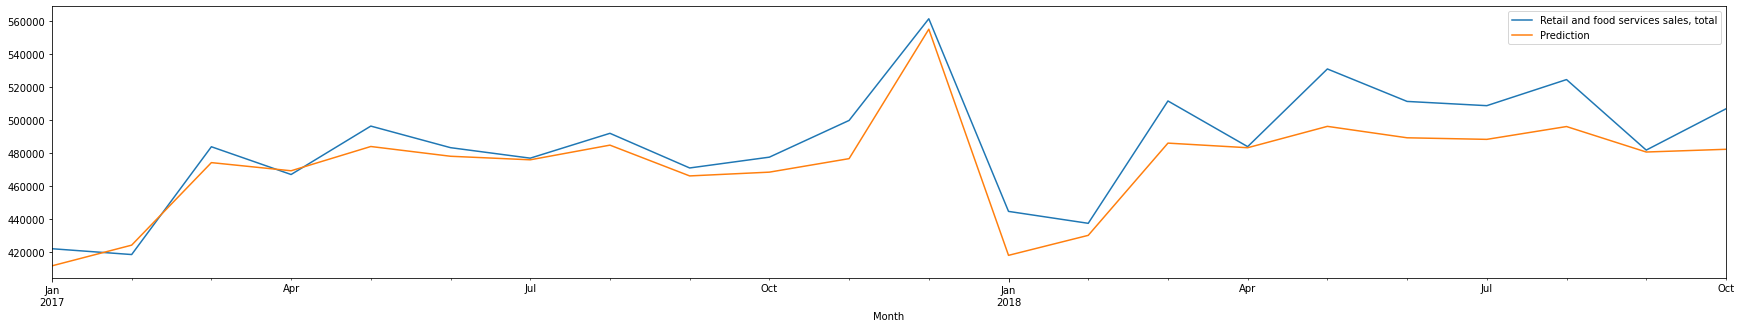

In [371]:
plt.pyplot.figure(figsize = (20, 5))
Retail_and_food_services_sales_total_validate.plot()
plt.pyplot.show()

Compute the absolute difference between actual sales with forecasted sales

In [372]:
Retail_and_food_services_sales_total_validate['Abs Diff'] = (Retail_and_food_services_sales_total_validate['Retail and food services sales, total'] - Retail_and_food_services_sales_total_validate['Prediction']).abs()
Retail_and_food_services_sales_total_validate['Abs Diff %'] = (Retail_and_food_services_sales_total_validate['Retail and food services sales, total'] - Retail_and_food_services_sales_total_validate['Prediction']).abs()/Retail_and_food_services_sales_total_validate['Retail and food services sales, total']
Retail_and_food_services_sales_total_validate.loc['Average Abs Diff %'] = pd.Series(Retail_and_food_services_sales_total_validate['Abs Diff %'].mean(), index = ['Abs Diff %'])
Retail_and_food_services_sales_total_validate.loc['Min Abs Diff %'] = pd.Series(Retail_and_food_services_sales_total_validate['Abs Diff %'].min(), index = ['Abs Diff %'])
Retail_and_food_services_sales_total_validate.loc['Max Abs Diff %'] = pd.Series(Retail_and_food_services_sales_total_validate['Abs Diff %'].max(), index = ['Abs Diff %'])
Retail_and_food_services_sales_total_validate

,"Retail and food services sales, total",Prediction,Abs Diff,Abs Diff %
Month,,,,
2017-01-01 00:00:00,422128.0,411758.573726,10369.426274,0.024565
2017-02-01 00:00:00,418602.0,424295.467196,5693.467196,0.013601
2017-03-01 00:00:00,483895.0,474282.899135,9612.100865,0.019864
2017-04-01 00:00:00,467082.0,469340.420550,2258.420550,0.004835
2017-05-01 00:00:00,496410.0,484046.313287,12363.686713,0.024906
2017-06-01 00:00:00,483338.0,478132.258695,5205.741305,0.010770
2017-07-01 00:00:00,476983.0,475985.993348,997.006652,0.002090
2017-08-01 00:00:00,492031.0,484867.260447,7163.739553,0.014560
2017-09-01 00:00:00,471043.0,466221.722427,4821.277573,0.010235


3.7.1.9. Compare all historical/actual sales with forecasted sales

Filter the actual/historical sales to periods when there is no forecasted sales data and when there is forecasted sales data.

In [373]:
Retail_and_food_services_sales_total = monthly_retail_data.filter(items=['Retail and food services sales, total'])
Retail_and_food_services_sales_total_1 = Retail_and_food_services_sales_total.loc['2005-01-01':'2016-12-01']
Retail_and_food_services_sales_total_2 = Retail_and_food_services_sales_total.loc['2017-01-01':]

Predict 48 months of sales using newly generated model.

In [374]:
pred_list = []

batch = Retail_and_food_services_sales_total_train_scaled[-n_inputs:].reshape((1, n_inputs, n_features))

for i in range(n_predict_predict):
    pred_list.append(Retail_and_food_services_sales_total_model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

In [375]:
Retail_and_food_services_sales_total_forecast_all = pd.DataFrame(scaler.inverse_transform(pred_list), index = Retail_and_food_services_sales_total_2[-n_predict_predict:].index, columns = ['Prediction'])

Convert the scaled numbers back to sales numbers.

In [376]:
Retail_and_food_services_sales_total_forecast_all

,Prediction
Month,
2017-01-01,411758.573726
2017-02-01,424295.467196
2017-03-01,474282.899135
2017-04-01,469340.420550
2017-05-01,484046.313287
2017-06-01,478132.258695
2017-07-01,475985.993348
2017-08-01,484867.260447
2017-09-01,466221.722427


Join actual/historical sales data with forecast sales data

In [377]:
Retail_and_food_services_sales_total_validate_all = pd.DataFrame(Retail_and_food_services_sales_total_forecast_all, index = Retail_and_food_services_sales_total_2.index, columns=['Prediction'])
Retail_and_food_services_sales_total_validate_all = pd.concat([Retail_and_food_services_sales_total_2, Retail_and_food_services_sales_total_validate_all], axis=1)
Retail_and_food_services_sales_total_validate_all = Retail_and_food_services_sales_total_1.append(Retail_and_food_services_sales_total_validate_all, sort=True)

Plot all data, including both actual/historical sales data with forecast sales data

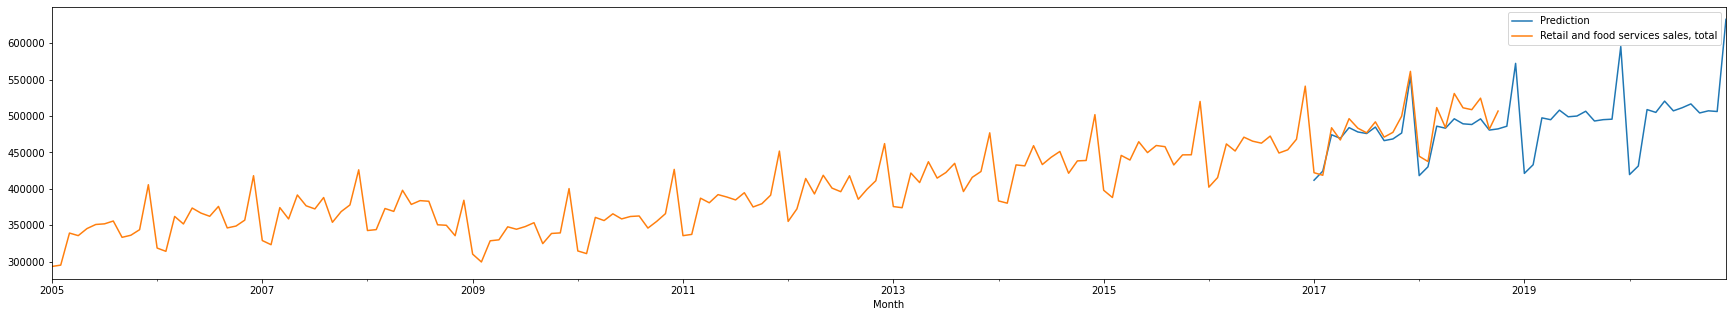

In [378]:
Retail_and_food_services_sales_total_validate_all.plot()
plt.pyplot.show()

##### 3.7.2. Retail sales and food services excl motor vehicle and parts

3.7.2.1. Filter Monthly Retail Data to just Retail sales and food services excl motor vehicle and parts

In [379]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_data = monthly_retail_actuals.filter(items=['Retail sales and food services excl motor vehicle and parts'])

In [380]:
print('All: ', Retail_sales_and_food_services_excl_motor_vehicle_and_parts_data.shape)

All:  (166, 1)


3.7.2.2. Split the data into Train and Test data
We will be diving data into two sets of data:

* Train Data
* Test Data

Usually we use 70 Train/30 Test (70/30) split, 80 Train/20 Test (80/20) split, 90 Train/10 Test (90/10) split or even 95 Train/5 Test (95/5) where train data is used to create a forecast and test data is used to validate the forecast, but for simplification purposes, we will split the data as follows:

* Train Data: January 2005 thru December 2016
* Test Data: January 2017 thru October 2018

In [383]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_train = Retail_sales_and_food_services_excl_motor_vehicle_and_parts_data.loc['2005-01-01':'2016-12-01']
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_test = Retail_sales_and_food_services_excl_motor_vehicle_and_parts_data.loc['2017-01-01':]

Validate data split was done correctly

In [384]:
print( 'Train: ', Retail_sales_and_food_services_excl_motor_vehicle_and_parts_train.shape)
print( 'Test: ', Retail_sales_and_food_services_excl_motor_vehicle_and_parts_test.shape)

Train:  (144, 1)
Test:  (22, 1)


3.7.2.3. Tranform data from real number to range of numbers between 0 and 1.

Many machine learning algorithms, such as neural networks, regression-based algorithms, K-nearest neighbors, support vector machines with radial bias kernel functions, principal components analysis, and algorithms using linear discriminant analysis don't perform as well if the features are not on relatively similar scales.

Tip:

* Use MinMaxScaler as your default
* Use RobustScaler if you have outliers and can handle a larger range
* Use StandardScaler if you need normalized features
* Use Normalizer sparingly - it normalizes rows, not columns

In [385]:
scaler = MinMaxScaler()
scaler.fit(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_train)
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_train_scaled = scaler.transform(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_train)
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_test_scaled = scaler.transform(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_test)

Validate scaling was done correctly

Please note that all values are between 0 and 1.

In [386]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_train_scaled

array([[0.0151114 ],
       [0.        ],
       [0.143271  ],
       [0.1405907 ],
       [0.18325875],
       [0.17640963],
       [0.16957935],
       [0.21839936],
       [0.16844882],
       [0.20925621],
       [0.23946488],
       [0.50322201],
       [0.11631259],
       [0.08706015],
       [0.2408121 ],
       [0.22313816],
       [0.30112582],
       [0.27273541],
       [0.25058646],
       [0.30468227],
       [0.21243111],
       [0.23700598],
       [0.28875124],
       [0.55998398],
       [0.16098262],
       [0.12092892],
       [0.29295775],
       [0.2503792 ],
       [0.36842056],
       [0.3236045 ],
       [0.30684441],
       [0.35454331],
       [0.24659193],
       [0.31138066],
       [0.38787037],
       [0.60713646],
       [0.22930425],
       [0.22019878],
       [0.3211456 ],
       [0.31592162],
       [0.44143389],
       [0.38137453],
       [0.40478591],
       [0.40072071],
       [0.29175185],
       [0.31421169],
       [0.28056903],
       [0.488

3.7.2.4. Set parameter values

It is easier to change parameter values in one place, so you can track changes to parameter values and its respective model performance.

In [387]:
n_inputs = 12
n_features = 1
n_batch_size = 1
n_epochs = 100
n_units = 400
n_dropouts = 0.1
n_predict_validate = 22
n_predict_predict = 48

3.7.2.5. Generate input data for the model

Time series data requires preparation before it can be used to train a supervised learning model, such as a deep learning model.

In [388]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_generator = TimeseriesGenerator(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_train_scaled, Retail_sales_and_food_services_excl_motor_vehicle_and_parts_train_scaled, length = n_inputs, batch_size = n_batch_size)

3.7.2.6. Develop Model

Please note that the following step takes some time to complete, especially you increase the n_epochs value.

In [389]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_model = Sequential()
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_model.add(LSTM(n_units, activation='relu', input_shape=(n_inputs, n_features)))
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_model.add(Dropout(n_dropouts))
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_model.add(Dense(1))
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_model.compile(optimizer='adam', loss='mse')

Retail_sales_and_food_services_excl_motor_vehicle_and_parts_model.fit_generator(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_generator, epochs=n_epochs)

Epoch 1/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0319
Epoch 2/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0151
Epoch 3/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0149
Epoch 4/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0105
Epoch 5/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0093
Epoch 6/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0099
Epoch 7/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0057
Epoch 8/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0049
Epoch 9/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0050
Epoch 10/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0044
Epoch 11/100
132/132 [==============================] - 2s 15ms/step - loss: 0.0052
Epoch 12/100
132/132 [==============================] - 2s 15ms/step - loss: 0.0043
E

3.7.2.7. Predict using Model

Predict 22 months of sales using newly generated model.

In [390]:
pred_list = []

batch = Retail_sales_and_food_services_excl_motor_vehicle_and_parts_train_scaled[-n_inputs:].reshape((1, n_inputs, n_features))

for i in range(n_predict_validate):
    pred_list.append(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

Convert the scaled numbers back to sales numbers.

In [395]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index = Retail_sales_and_food_services_excl_motor_vehicle_and_parts_test[-n_predict_validate:].index, columns = ['Prediction'])

3.7.2.8. Validate Model

Join test data with 22 months of sales number with predicted data with 22 months of predicted sales number.

In [397]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate = pd.concat([Retail_sales_and_food_services_excl_motor_vehicle_and_parts_test, Retail_sales_and_food_services_excl_motor_vehicle_and_parts_predict], axis = 1)

In [398]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate.tail(22)

,Retail sales and food services excl motor vehicle and parts,Prediction
Month,,
2017-01-01,337097.0,330602.496257
2017-02-01,329169.0,335131.875451
2017-03-01,377328.0,372906.773045
2017-04-01,369212.0,368961.522315
2017-05-01,390040.0,382222.447490
2017-06-01,379823.0,379990.122306
2017-07-01,373897.0,376068.596832
2017-08-01,386372.0,382011.792521
2017-09-01,370260.0,370463.134911


Plot the difference in actual sales with forecast sales

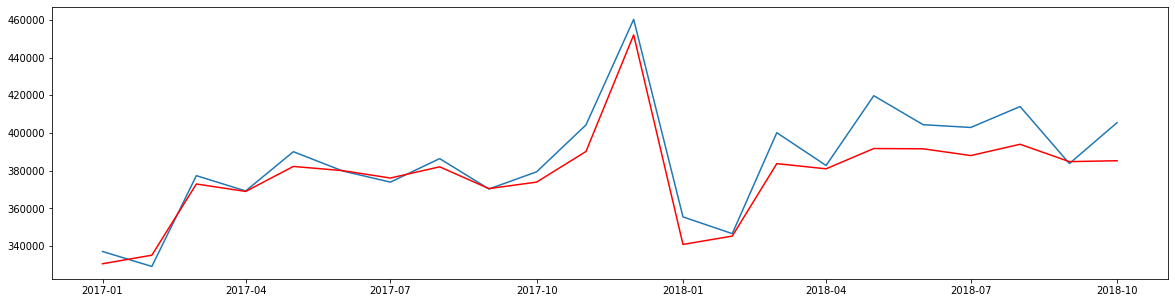

In [399]:
plt.pyplot.figure(figsize = (20, 5))
plt.pyplot.plot(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate.index, Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate['Retail sales and food services excl motor vehicle and parts'])
plt.pyplot.plot(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate.index, Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate['Prediction'], color='r')
plt.pyplot.show()

Compute the absolute difference between actual sales with forecasted sales

In [408]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate['Abs Diff'] = (Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate['Retail sales and food services excl motor vehicle and parts'] - Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate['Prediction']).abs()
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate['Abs Diff %'] = (Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate['Retail sales and food services excl motor vehicle and parts'] - Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate['Prediction']).abs()/Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate['Retail sales and food services excl motor vehicle and parts']
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate.loc['Average Abs Diff %'] = pd.Series(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate['Abs Diff %'].mean(), index = ['Abs Diff %'])
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate.loc['Min Abs Diff %'] = pd.Series(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate['Abs Diff %'].min(), index = ['Abs Diff %'])
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate.loc['Max Abs Diff %'] = pd.Series(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate['Abs Diff %'].max(), index = ['Abs Diff %'])
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate


,Retail sales and food services excl motor vehicle and parts,Prediction,Abs Diff,Abs Diff %
Month,,,,
2017-01-01 00:00:00,337097.0,330602.496257,6494.503743,0.019266
2017-02-01 00:00:00,329169.0,335131.875451,5962.875451,0.018115
2017-03-01 00:00:00,377328.0,372906.773045,4421.226955,0.011717
2017-04-01 00:00:00,369212.0,368961.522315,250.477685,0.000678
2017-05-01 00:00:00,390040.0,382222.447490,7817.552510,0.020043
2017-06-01 00:00:00,379823.0,379990.122306,167.122306,0.000440
2017-07-01 00:00:00,373897.0,376068.596832,2171.596832,0.005808
2017-08-01 00:00:00,386372.0,382011.792521,4360.207479,0.011285
2017-09-01 00:00:00,370260.0,370463.134911,203.134911,0.000549


3.7.2.9. Compare all historical/actual sales with forecasted sales

Filter the actual/historical sales to periods when there is no forecasted sales data and when there is forecasted sales data.

In [410]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts = monthly_retail_data.filter(items=['Retail sales and food services excl motor vehicle and parts'])
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_1 = Retail_sales_and_food_services_excl_motor_vehicle_and_parts.loc['2005-01-01':'2016-12-01']
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_2 = Retail_sales_and_food_services_excl_motor_vehicle_and_parts.loc['2017-01-01':]

Predict 48 months of sales using newly generated model.

In [411]:
pred_list = []

batch = Retail_sales_and_food_services_excl_motor_vehicle_and_parts_train_scaled[-n_inputs:].reshape((1, n_inputs, n_features))

for i in range(n_predict_predict):
    pred_list.append(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

Convert the scaled numbers back to sales numbers.

In [412]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_forecast_all = pd.DataFrame(scaler.inverse_transform(pred_list), index = Retail_sales_and_food_services_excl_motor_vehicle_and_parts_2[-n_predict_predict:].index, columns = ['Prediction'])

In [413]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_forecast_all

,Prediction
Month,
2017-01-01,330602.496257
2017-02-01,335131.875451
2017-03-01,372906.773045
2017-04-01,368961.522315
2017-05-01,382222.447490
2017-06-01,379990.122306
2017-07-01,376068.596832
2017-08-01,382011.792521
2017-09-01,370463.134911


Join actual/historical sales data with forecast sales data

In [414]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate_all = pd.DataFrame(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_forecast_all, index = Retail_sales_and_food_services_excl_motor_vehicle_and_parts_2.index, columns=['Prediction'])
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate_all = pd.concat([Retail_sales_and_food_services_excl_motor_vehicle_and_parts_2, Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate_all], axis=1)
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate_all = Retail_sales_and_food_services_excl_motor_vehicle_and_parts_1.append(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate_all, sort=True)

Plot all data, including both actual/historical sales data with forecast sales data

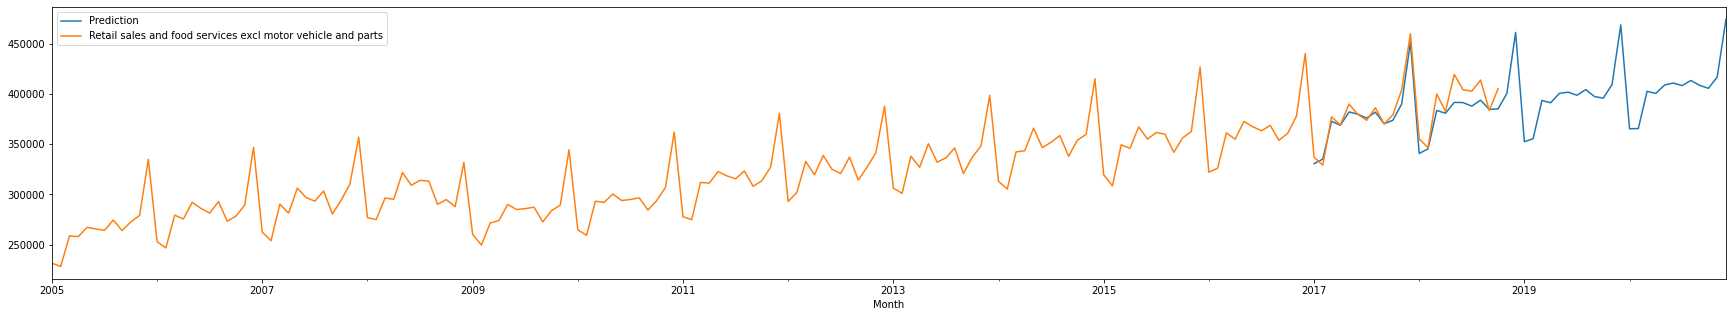

In [415]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_validate_all.plot()
plt.pyplot.show()

##### 3.7.3. Retail sales and food services excl gasoline stations

3.7.3.1. Filter Monthly Retail Data to just Retail sales and food services excl gasoline stations data

In [416]:
Retail_sales_and_food_services_excl_gasoline_stations_data = monthly_retail_actuals.filter(items=['Retail sales and food services excl gasoline stations'])
print('All: ', Retail_sales_and_food_services_excl_gasoline_stations_data.shape)

All:  (166, 1)


3.7.3.2. Split the data into Train and Test data

We will be diving data into two sets of data:

* Train Data
* Test Data

Usually we use 70 Train/30 Test (70/30) split, 80 Train/20 Test (80/20) split, 90 Train/10 Test (90/10) split or even 95 Train/5 Test (95/5) where train data is used to create a forecast and test data is used to validate the forecast, but for simplification purposes, we will split the data as follows:

* Train Data: January 2005 thru December 2016
* Test Data: January 2017 thru October 2018

In [417]:
Retail_sales_and_food_services_excl_gasoline_stations_train = Retail_sales_and_food_services_excl_gasoline_stations_data.loc['2005-01-01':'2016-12-01']
Retail_sales_and_food_services_excl_gasoline_stations_test = Retail_sales_and_food_services_excl_gasoline_stations_data.loc['2017-01-01':]

Validate data split was done correctly

In [418]:
print( 'Train: ', Retail_sales_and_food_services_excl_gasoline_stations_train.shape)
print( 'Test: ', Retail_sales_and_food_services_excl_gasoline_stations_test.shape)

Train:  (144, 1)
Test:  (22, 1)


3.7.3.3. Tranform data from real number to range of numbers between 0 and 1

Many machine learning algorithms, such as neural networks, regression-based algorithms, K-nearest neighbors, support vector machines with radial bias kernel functions, principal components analysis, and algorithms using linear discriminant analysis don't perform as well if the features are not on relatively similar scales.

Tip:

* Use MinMaxScaler as your default
* Use RobustScaler if you have outliers and can handle a larger range
* Use StandardScaler if you need normalized features
* Use Normalizer sparingly - it normalizes rows, not columns

In [420]:
scaler = MinMaxScaler()
scaler.fit(Retail_sales_and_food_services_excl_gasoline_stations_train)
Retail_sales_and_food_services_excl_gasoline_stations_train_scaled = scaler.transform(Retail_sales_and_food_services_excl_gasoline_stations_train)
Retail_sales_and_food_services_excl_gasoline_stations_test_scaled = scaler.transform(Retail_sales_and_food_services_excl_gasoline_stations_test)

Validate scaling was done correctly

Please note that all values are between 0 and 1.

In [421]:
Retail_sales_and_food_services_excl_gasoline_stations_train_scaled

array([[0.        ],
       [0.01002307],
       [0.1767843 ],
       [0.15712479],
       [0.19542679],
       [0.21596043],
       [0.21115272],
       [0.21770028],
       [0.12327748],
       [0.13398557],
       [0.18845477],
       [0.44819732],
       [0.08426525],
       [0.07187614],
       [0.25388   ],
       [0.20159613],
       [0.28093599],
       [0.25128703],
       [0.22661388],
       [0.2817765 ],
       [0.18360503],
       [0.20127253],
       [0.24239024],
       [0.49436228],
       [0.12716904],
       [0.10802644],
       [0.29772516],
       [0.22762249],
       [0.34645368],
       [0.2877189 ],
       [0.26880744],
       [0.3359263 ],
       [0.20410084],
       [0.25871293],
       [0.29545999],
       [0.5016495 ],
       [0.1523591 ],
       [0.16214263],
       [0.26470156],
       [0.24190695],
       [0.34355392],
       [0.25520801],
       [0.27023631],
       [0.27778408],
       [0.15828889],
       [0.17451912],
       [0.1596169 ],
       [0.378

3.7.3.4. Set parameter values

It is easier to change parameter values in one place, so you can track changes to parameter values and its respective model performance.

In [504]:
#Result = 0.032014
#n_inputs = 12
#n_features = 1
#n_batch_size = 1
#n_epochs = 100
#n_units = 400
#n_dropouts = 0.1
#n_predict_validate = 22
#n_predict_predict = 48

In [505]:
#Result = 0.243721
n_inputs = 12
n_features = 1
n_batch_size = 1
n_epochs = 100
n_units = 400
n_dropouts = 0.2
n_predict_validate = 22
n_predict_predict = 48

3.7.3.5. Generate input data for the model

Time series data requires preparation before it can be used to train a supervised learning model, such as a deep learning model.

In [506]:
Retail_sales_and_food_services_excl_gasoline_stations_generator = TimeseriesGenerator(Retail_sales_and_food_services_excl_gasoline_stations_train_scaled, Retail_sales_and_food_services_excl_gasoline_stations_train_scaled, length = n_inputs, batch_size = n_batch_size)

3.7.3.6. Develop Model

Please note that the following step takes some time to complete, especially you increase the n_epochs value.

In [507]:
Retail_sales_and_food_services_excl_gasoline_stations_model = Sequential()
Retail_sales_and_food_services_excl_gasoline_stations_model.add(LSTM(n_units, activation='relu', input_shape=(n_inputs, n_features)))
Retail_sales_and_food_services_excl_gasoline_stations_model.add(Dropout(n_dropouts))
Retail_sales_and_food_services_excl_gasoline_stations_model.add(Dense(1))
Retail_sales_and_food_services_excl_gasoline_stations_model.compile(optimizer='adam', loss='mse')

Retail_sales_and_food_services_excl_gasoline_stations_model.fit_generator(Retail_sales_and_food_services_excl_gasoline_stations_generator, epochs=n_epochs)

Epoch 1/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0229
Epoch 2/100
132/132 [==============================] - 1s 11ms/step - loss: 0.0199
Epoch 3/100
132/132 [==============================] - 1s 11ms/step - loss: 0.0141
Epoch 4/100
132/132 [==============================] - 1s 11ms/step - loss: 0.0140
Epoch 5/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0123
Epoch 6/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0106
Epoch 7/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0095
Epoch 8/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0092
Epoch 9/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0060
Epoch 10/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0059
Epoch 11/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0067
Epoch 12/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0062
E

3.7.3.7. Predict using Model

Predict 22 months of sales using newly generated model.

In [508]:
pred_list = []

batch = Retail_sales_and_food_services_excl_gasoline_stations_train_scaled[-n_inputs:].reshape((1, n_inputs, n_features))

for i in range(n_predict_validate):
    pred_list.append(Retail_sales_and_food_services_excl_gasoline_stations_model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

Convert the scaled numbers back to sales numbers.

In [509]:
Retail_sales_and_food_services_excl_gasoline_stations_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index = Retail_sales_and_food_services_excl_gasoline_stations_test[-n_predict_validate:].index, columns = ['Prediction'])

3.7.3.8. Validate Model

Join test data with 22 months of sales number with predicted data with 22 months of predicted sales number.

In [510]:
Retail_sales_and_food_services_excl_gasoline_stations_validate = pd.concat([Retail_sales_and_food_services_excl_gasoline_stations_test, Retail_sales_and_food_services_excl_gasoline_stations_predict], axis = 1)

In [511]:
Retail_sales_and_food_services_excl_gasoline_stations_validate.tail(22)

,Retail sales and food services excl gasoline stations,Prediction
Month,,
2017-01-01,387898.0,293593.033269
2017-02-01,386030.0,306485.459713
2017-03-01,446673.0,336798.313980
2017-04-01,429509.0,329908.050637
2017-05-01,457071.0,340348.101850
2017-06-01,444729.0,335340.635717
2017-07-01,438586.0,333923.234435
2017-08-01,452214.0,341633.558260
2017-09-01,431097.0,326010.720832


Plot the difference in actual sales with forecast sales

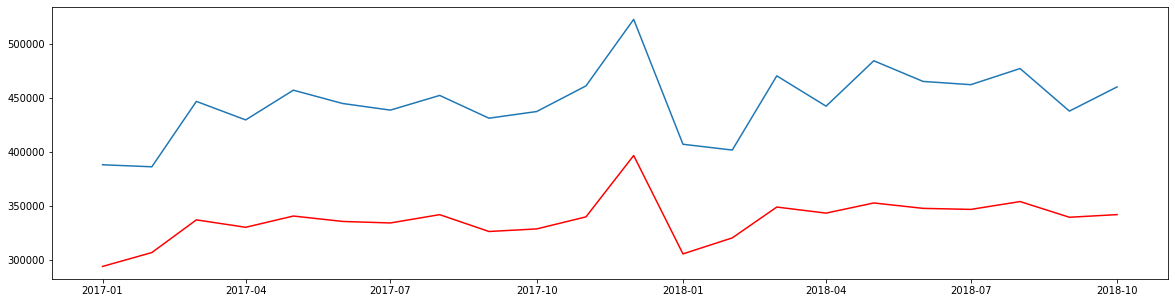

In [512]:
plt.pyplot.figure(figsize = (20, 5))
plt.pyplot.plot(Retail_sales_and_food_services_excl_gasoline_stations_validate.index, Retail_sales_and_food_services_excl_gasoline_stations_validate['Retail sales and food services excl gasoline stations'])
plt.pyplot.plot(Retail_sales_and_food_services_excl_gasoline_stations_validate.index, Retail_sales_and_food_services_excl_gasoline_stations_validate['Prediction'], color='r')
plt.pyplot.show()

Compute the absolute difference between actual sales with forecasted sales

In [513]:
Retail_sales_and_food_services_excl_gasoline_stations_validate['Abs Diff'] = (Retail_sales_and_food_services_excl_gasoline_stations_validate['Retail sales and food services excl gasoline stations'] - Retail_sales_and_food_services_excl_gasoline_stations_validate['Prediction']).abs()
Retail_sales_and_food_services_excl_gasoline_stations_validate['Abs Diff %'] = (Retail_sales_and_food_services_excl_gasoline_stations_validate['Retail sales and food services excl gasoline stations'] - Retail_sales_and_food_services_excl_gasoline_stations_validate['Prediction']).abs()/Retail_sales_and_food_services_excl_gasoline_stations_validate['Retail sales and food services excl gasoline stations']
Retail_sales_and_food_services_excl_gasoline_stations_validate.loc['Average Abs Diff %'] = pd.Series(Retail_sales_and_food_services_excl_gasoline_stations_validate['Abs Diff %'].mean(), index = ['Abs Diff %'])
Retail_sales_and_food_services_excl_gasoline_stations_validate.loc['Min Abs Diff %'] = pd.Series(Retail_sales_and_food_services_excl_gasoline_stations_validate['Abs Diff %'].min(), index = ['Abs Diff %'])
Retail_sales_and_food_services_excl_gasoline_stations_validate.loc['Max Abs Diff %'] = pd.Series(Retail_sales_and_food_services_excl_gasoline_stations_validate['Abs Diff %'].max(), index = ['Abs Diff %'])
Retail_sales_and_food_services_excl_gasoline_stations_validate

,Retail sales and food services excl gasoline stations,Prediction,Abs Diff,Abs Diff %
Month,,,,
2017-01-01 00:00:00,387898.0,293593.033269,94304.966731,0.243118
2017-02-01 00:00:00,386030.0,306485.459713,79544.540287,0.206058
2017-03-01 00:00:00,446673.0,336798.313980,109874.686020,0.245985
2017-04-01 00:00:00,429509.0,329908.050637,99600.949363,0.231895
2017-05-01 00:00:00,457071.0,340348.101850,116722.898150,0.255371
2017-06-01 00:00:00,444729.0,335340.635717,109388.364283,0.245966
2017-07-01 00:00:00,438586.0,333923.234435,104662.765565,0.238637
2017-08-01 00:00:00,452214.0,341633.558260,110580.441740,0.244531
2017-09-01 00:00:00,431097.0,326010.720832,105086.279168,0.243765


3.7.3.9. Compare all historical/actual sales with forecasted sales

Filter the actual/historical sales to periods when there is no forecasted sales data and when there is forecasted sales data.

In [431]:
Retail_sales_and_food_services_excl_gasoline_stations = monthly_retail_data.filter(items=['Retail sales and food services excl gasoline stations'])
Retail_sales_and_food_services_excl_gasoline_stations_1 = Retail_sales_and_food_services_excl_gasoline_stations.loc['2005-01-01':'2016-12-01']
Retail_sales_and_food_services_excl_gasoline_stations_2 = Retail_sales_and_food_services_excl_gasoline_stations.loc['2017-01-01':]

Predict 48 months of sales using newly generated model.

In [432]:
pred_list = []

batch = Retail_sales_and_food_services_excl_gasoline_stations_train_scaled[-n_inputs:].reshape((1, n_inputs, n_features))

for i in range(n_predict_predict):
    pred_list.append(Retail_sales_and_food_services_excl_gasoline_stations_model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

In [433]:
Retail_sales_and_food_services_excl_gasoline_stations_forecast_all = pd.DataFrame(scaler.inverse_transform(pred_list), index = Retail_sales_and_food_services_excl_gasoline_stations_2[-n_predict_predict:].index, columns = ['Prediction'])

Convert the scaled numbers back to sales numbers.

In [434]:
Retail_sales_and_food_services_excl_gasoline_stations_forecast_all

,Prediction
Month,
2017-01-01,388995.162128
2017-02-01,408622.498429
2017-03-01,456878.033593
2017-04-01,444072.471885
2017-05-01,460617.661203
2017-06-01,453874.247602
2017-07-01,452075.135977
2017-08-01,465049.730498
2017-09-01,443081.988957


Join actual/historical sales data with forecast sales data

In [435]:
Retail_sales_and_food_services_excl_gasoline_stations_validate_all = pd.DataFrame(Retail_sales_and_food_services_excl_gasoline_stations_forecast_all, index = Retail_sales_and_food_services_excl_gasoline_stations_2.index, columns=['Prediction'])
Retail_sales_and_food_services_excl_gasoline_stations_validate_all = pd.concat([Retail_sales_and_food_services_excl_gasoline_stations_2, Retail_sales_and_food_services_excl_gasoline_stations_validate_all], axis=1)
Retail_sales_and_food_services_excl_gasoline_stations_validate_all = Retail_sales_and_food_services_excl_gasoline_stations_1.append(Retail_sales_and_food_services_excl_gasoline_stations_validate_all, sort=True)

Plot all data, including both actual/historical sales data with forecast sales data

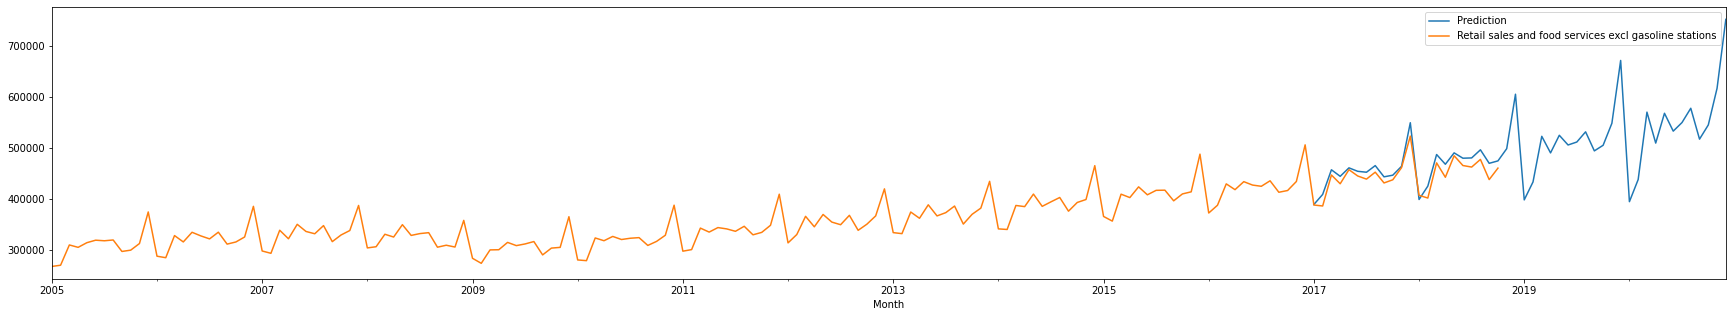

In [436]:
Retail_sales_and_food_services_excl_gasoline_stations_validate_all.plot()
plt.pyplot.show()

##### 3.7.4. Retail sales and food services excl motor vehicle and parts and gasoline stations

3.7.4.1. Filter Monthly Retail Data to just Retail and food services sales, total data to just Retail sales and food services excl motor vehicle and parts and gasoline stations

In [437]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_data = monthly_retail_actuals.filter(items=['Retail sales and food services excl motor vehicle and parts and gasoline stations'])
print('All: ', Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_data.shape)

All:  (166, 1)


3.7.4.2. Split the data into Train and Test data

We will be diving data into two sets of data:

* Train Data
* Test Data

Usually we use 70 Train/30 Test (70/30) split, 80 Train/20 Test (80/20) split, 90 Train/10 Test (90/10) split or even 95 Train/5 Test (95/5) where train data is used to create a forecast and test data is used to validate the forecast, but for simplification purposes, we will split the data as follows:

* Train Data: January 2005 thru December 2016
* Test Data: January 2017 thru October 2018

In [438]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_train = Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_data.loc['2005-01-01':'2016-12-01']
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_test = Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_data.loc['2017-01-01':]

Validate data split was done correctly

In [439]:
print( 'Train: ', Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_train.shape)
print( 'Test: ', Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_test.shape)

Train:  (144, 1)
Test:  (22, 1)


3.7.4.3. Tranform data from real number to range of numbers between 0 and 1.

Many machine learning algorithms, such as neural networks, regression-based algorithms, K-nearest neighbors, support vector machines with radial bias kernel functions, principal components analysis, and algorithms using linear discriminant analysis don't perform as well if the features are not on relatively similar scales.

Tip:

* Use MinMaxScaler as your default
* Use RobustScaler if you have outliers and can handle a larger range
* Use StandardScaler if you need normalized features
* Use Normalizer sparingly - it normalizes rows, not columns

In [440]:
scaler = MinMaxScaler()
scaler.fit(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_train)
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_train_scaled = scaler.transform(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_train)
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_test_scaled = scaler.transform(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_test)

Validate scaling was done correctly

Please note that all values are between 0 and 1.

In [441]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_train_scaled

array([[0.0130013 ],
       [0.        ],
       [0.12890807],
       [0.12029669],
       [0.16219417],
       [0.15146711],
       [0.13424435],
       [0.17412028],
       [0.12130251],
       [0.16275406],
       [0.22077433],
       [0.49818656],
       [0.0935162 ],
       [0.07041214],
       [0.20917523],
       [0.18010564],
       [0.24720304],
       [0.21679566],
       [0.18626936],
       [0.24086094],
       [0.17465044],
       [0.20853607],
       [0.27114941],
       [0.55096469],
       [0.13989773],
       [0.10351491],
       [0.25552208],
       [0.20541457],
       [0.30628363],
       [0.26358844],
       [0.24489412],
       [0.29659707],
       [0.19648608],
       [0.25596306],
       [0.33455055],
       [0.56908922],
       [0.17327302],
       [0.16901688],
       [0.25235599],
       [0.23974116],
       [0.34773518],
       [0.27676811],
       [0.2932526 ],
       [0.30215631],
       [0.20679199],
       [0.25299515],
       [0.27090167],
       [0.507

3.7.4.4. Set parameter values

It is easier to change parameter values in one place, so you can track changes to parameter values and its respective model performance.

In [ ]:
#Results = 0.040832
#n_inputs = 12
#n_features = 1
#n_batch_size = 1
#n_epochs = 100
#n_units = 400
#n_dropouts = 0.1
#n_predict_validate = 22
#n_predict_predict = 48

In [515]:
#Results = 0.093259
#n_inputs = 12
#n_features = 1
#n_batch_size = 1
#n_epochs = 100
#n_units = 400
#n_dropouts = 0.2
#n_predict_validate = 22
#n_predict_predict = 48

In [524]:
#Results = 0.063455
#n_inputs = 12
#n_features = 1
#n_batch_size = 1
#n_epochs = 100
#n_units = 400
#n_dropouts = 0.15
#n_predict_validate = 22
#n_predict_predict = 48

In [533]:
#Results = 0.018319
n_inputs = 12
n_features = 1
n_batch_size = 2
n_epochs = 100
n_units = 400
n_dropouts = 0.15
n_predict_validate = 22
n_predict_predict = 48

3.7.4.5. Generate input data for the model

Time series data requires preparation before it can be used to train a supervised learning model, such as a deep learning model.

In [534]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_generator = TimeseriesGenerator(Retail_and_food_services_sales_total_train_scaled, Retail_and_food_services_sales_total_train_scaled, length = n_inputs, batch_size = n_batch_size)

3.7.4.6. Develop Model

Please note that the following step takes some time to complete, especially you increase the n_epochs value.

In [535]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_model = Sequential()
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_model.add(LSTM(n_units, activation='relu', input_shape=(n_inputs, n_features)))
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_model.add(Dropout(n_dropouts))
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_model.add(Dense(1))
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_model.compile(optimizer='adam', loss='mse')

Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_model.fit_generator(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_generator, epochs=n_epochs)

Epoch 1/100
66/66 [==============================] - 1s 16ms/step - loss: 0.0377
Epoch 2/100
66/66 [==============================] - 1s 15ms/step - loss: 0.0198
Epoch 3/100
66/66 [==============================] - 1s 15ms/step - loss: 0.0149
Epoch 4/100
66/66 [==============================] - 1s 15ms/step - loss: 0.0148
Epoch 5/100
66/66 [==============================] - 1s 15ms/step - loss: 0.0171
Epoch 6/100
66/66 [==============================] - 1s 15ms/step - loss: 0.0131
Epoch 7/100
66/66 [==============================] - 1s 15ms/step - loss: 0.0107
Epoch 8/100
66/66 [==============================] - 1s 15ms/step - loss: 0.0093
Epoch 9/100
66/66 [==============================] - 1s 15ms/step - loss: 0.0093
Epoch 10/100
66/66 [==============================] - 1s 15ms/step - loss: 0.0083
Epoch 11/100
66/66 [==============================] - 1s 15ms/step - loss: 0.0082
Epoch 12/100
66/66 [==============================] - 1s 16ms/step - loss: 0.0084
Epoch 13/100
66/66 [=====

3.7.4.7. Predict using Model

Predict 22 months of sales using newly generated model.

In [536]:
pred_list = []

batch = Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_train_scaled[-n_inputs:].reshape((1, n_inputs, n_features))

for i in range(n_predict_validate):
    pred_list.append(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

Convert the scaled numbers back to sales numbers.

In [537]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index = Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_test[-n_predict_validate:].index, columns = ['Prediction'])

3.7.4.8. Validate Model

Join test data with 22 months of sales number with predicted data with 22 months of predicted sales number.

In [538]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate = pd.concat([Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_test, Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_predict], axis = 1)

In [539]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate.tail(22)

,Retail sales and food services excl motor vehicle and parts and gasoline stations,Prediction
Month,,
2017-01-01,302867.0,298143.648412
2017-02-01,296597.0,305274.338754
2017-03-01,340106.0,334098.234771
2017-04-01,331639.0,328816.117783
2017-05-01,350701.0,341049.249869
2017-06-01,341214.0,337873.090802
2017-07-01,335500.0,334721.805775
2017-08-01,346555.0,340751.467039
2017-09-01,330314.0,329573.188288


Plot the difference in actual sales with forecast sales

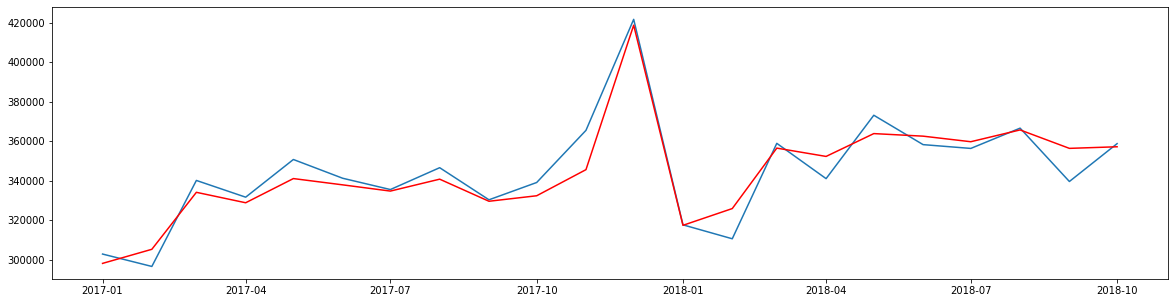

In [540]:
plt.pyplot.figure(figsize = (20, 5))
plt.pyplot.plot(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate.index, Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate['Retail sales and food services excl motor vehicle and parts and gasoline stations'])
plt.pyplot.plot(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate.index, Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate['Prediction'], color='r')
plt.pyplot.show()

Compute the absolute difference between actual sales with forecasted sales

In [541]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate['Abs Diff'] = (Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate['Retail sales and food services excl motor vehicle and parts and gasoline stations'] - Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate['Prediction']).abs()
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate['Abs Diff %'] = (Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate['Retail sales and food services excl motor vehicle and parts and gasoline stations'] - Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate['Prediction']).abs()/Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate['Retail sales and food services excl motor vehicle and parts and gasoline stations']
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate.loc['Average Abs Diff %'] = pd.Series(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate['Abs Diff %'].mean(), index = ['Abs Diff %'])
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate.loc['Min Abs Diff %'] = pd.Series(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate['Abs Diff %'].min(), index = ['Abs Diff %'])
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate.loc['Max Abs Diff %'] = pd.Series(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate['Abs Diff %'].max(), index = ['Abs Diff %'])
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate

,Retail sales and food services excl motor vehicle and parts and gasoline stations,Prediction,Abs Diff,Abs Diff %
Month,,,,
2017-01-01 00:00:00,302867.0,298143.648412,4723.351588,0.015595
2017-02-01 00:00:00,296597.0,305274.338754,8677.338754,0.029256
2017-03-01 00:00:00,340106.0,334098.234771,6007.765229,0.017664
2017-04-01 00:00:00,331639.0,328816.117783,2822.882217,0.008512
2017-05-01 00:00:00,350701.0,341049.249869,9651.750131,0.027521
2017-06-01 00:00:00,341214.0,337873.090802,3340.909198,0.009791
2017-07-01 00:00:00,335500.0,334721.805775,778.194225,0.002320
2017-08-01 00:00:00,346555.0,340751.467039,5803.532961,0.016746
2017-09-01 00:00:00,330314.0,329573.188288,740.811712,0.002243


3.7.4.9. Compare all historical/actual sales with forecasted sales

Filter the actual/historical sales to periods when there is no forecasted sales data and when there is forecasted sales data.

In [454]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations = monthly_retail_data.filter(items=['Retail sales and food services excl motor vehicle and parts and gasoline stations'])
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_1 = Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations.loc['2005-01-01':'2016-12-01']
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_2 = Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations.loc['2017-01-01':]

Predict 48 months of sales using newly generated model.

In [455]:
pred_list = []

batch = Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_train_scaled[-n_inputs:].reshape((1, n_inputs, n_features))

for i in range(n_predict_predict):
    pred_list.append(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

In [458]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_forecast_all = pd.DataFrame(scaler.inverse_transform(pred_list), index = Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_2[-n_predict_predict:].index, columns = ['Prediction'])

Convert the scaled numbers back to sales numbers.

In [459]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_forecast_all

,Prediction
Month,
2017-01-01,305709.334887
2017-02-01,312519.229620
2017-03-01,352238.200158
2017-04-01,350881.194317
2017-05-01,362141.176561
2017-06-01,355655.447961
2017-07-01,353791.219023
2017-08-01,358317.491049
2017-09-01,345529.968987


Join actual/historical sales data with forecast sales data

In [460]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate_all = pd.DataFrame(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_forecast_all, index = Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_2.index, columns=['Prediction'])
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate_all = pd.concat([Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_2, Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate_all], axis=1)
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate_all = Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_1.append(Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate_all, sort=True)

Plot all data, including both actual/historical sales data with forecast sales data

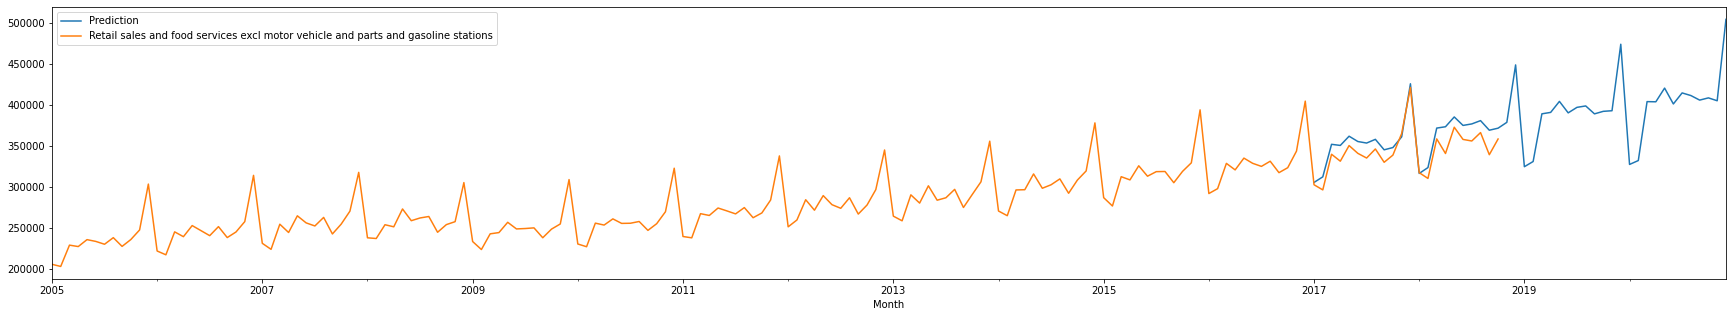

In [461]:
Retail_sales_and_food_services_excl_motor_vehicle_and_parts_and_gasoline_stations_validate_all.plot()
plt.pyplot.show()

##### 3.7.5. Retail sales, total

3.7.5.1. Filter Monthly Retail sales, total data

In [462]:
Retail_sales_total_data = monthly_retail_actuals.filter(items=['Retail sales, total'])
print('All: ', Retail_sales_total_data.shape)

All:  (166, 1)


3.7.5.2. Split the data into Train and Test data

We will be diving data into two sets of data:

* Train Data
* Test Data

Usually we use 70 Train/30 Test (70/30) split, 80 Train/20 Test (80/20) split, 90 Train/10 Test (90/10) split or even 95 Train/5 Test (95/5) where train data is used to create a forecast and test data is used to validate the forecast, but for simplification purposes, we will split the data as follows:

* Train Data: January 2005 thru December 2016
* Test Data: January 2017 thru October 2018

In [463]:
Retail_sales_total_train = Retail_sales_total_data.loc['2005-01-01':'2016-12-01']
Retail_sales_total_test = Retail_sales_total_data.loc['2017-01-01':]

Validate data split was done correctly

In [464]:
print( 'Train: ', Retail_sales_total_train.shape)
print( 'Test: ', Retail_sales_total_test.shape)

Train:  (144, 1)
Test:  (22, 1)


3.7.5.3. Tranform data from real number to range of numbers between 0 and 1.

Many machine learning algorithms, such as neural networks, regression-based algorithms, K-nearest neighbors, support vector machines with radial bias kernel functions, principal components analysis, and algorithms using linear discriminant analysis don't perform as well if the features are not on relatively similar scales.

Tip:

* Use MinMaxScaler as your default
* Use RobustScaler if you have outliers and can handle a larger range
* Use StandardScaler if you need normalized features
* Use Normalizer sparingly - it normalizes rows, not columns

In [465]:
scaler = MinMaxScaler()
scaler.fit(Retail_sales_total_train)
Retail_sales_total_train_scaled = scaler.transform(Retail_sales_total_train)
Retail_sales_total_test_scaled = scaler.transform(Retail_sales_total_test)

Validate scaling was done correctly

Please note that all values are between 0 and 1.

In [466]:
Retail_sales_total_train_scaled

array([[0.        ],
       [0.00839182],
       [0.19456232],
       [0.17493154],
       [0.21681356],
       [0.24439185],
       [0.24217942],
       [0.26268067],
       [0.16760967],
       [0.17565239],
       [0.2187313 ],
       [0.48626752],
       [0.10283717],
       [0.08590392],
       [0.28418838],
       [0.24054277],
       [0.3351468 ],
       [0.30545581],
       [0.28306403],
       [0.34313512],
       [0.21446965],
       [0.22444825],
       [0.27029723],
       [0.52916508],
       [0.14423862],
       [0.12057741],
       [0.32845511],
       [0.26527392],
       [0.40681501],
       [0.3387556 ],
       [0.31892534],
       [0.388635  ],
       [0.24334911],
       [0.30649402],
       [0.35534429],
       [0.56219284],
       [0.19996645],
       [0.20266398],
       [0.32165007],
       [0.30617213],
       [0.42529423],
       [0.34601853],
       [0.36581706],
       [0.35804182],
       [0.22595343],
       [0.21740293],
       [0.16216474],
       [0.376

3.7.5.4. Set parameter values

It is easier to change parameter values in one place, so you can track changes to parameter values and its respective model performance.

In [ ]:
#Results = 0.040390
#n_inputs = 12
#n_features = 1
#n_batch_size = 1
#n_epochs = 100
#n_units = 400
#n_dropouts = 0.1
#n_predict_validate = 22
#n_predict_predict = 48

In [542]:
#Results = 0.210950
n_inputs = 12
n_features = 1
n_batch_size = 1
n_epochs = 100
n_units = 400
n_dropouts = 0.2
n_predict_validate = 22
n_predict_predict = 48

3.7.5.5. Generate input data for the model

Time series data requires preparation before it can be used to train a supervised learning model, such as a deep learning model.

In [543]:
Retail_sales_total_generator = TimeseriesGenerator(Retail_sales_total_train_scaled, Retail_sales_total_train_scaled, length = n_inputs, batch_size = n_batch_size)

3.7.5.6. Develop Model

Please note that the following step takes some time to complete, especially you increase the n_epochs value.

In [544]:
Retail_sales_total_model = Sequential()
Retail_sales_total_model.add(LSTM(n_units, activation='relu', input_shape=(n_inputs, n_features)))
Retail_sales_total_model.add(Dropout(n_dropouts))
Retail_sales_total_model.add(Dense(1))
Retail_sales_total_model.compile(optimizer='adam', loss='mse')

Retail_sales_total_model.fit_generator(Retail_sales_total_generator, epochs=n_epochs)

Epoch 1/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0230
Epoch 2/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0205
Epoch 3/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0211
Epoch 4/100
132/132 [==============================] - 2s 13ms/step - loss: 0.0136
Epoch 5/100
132/132 [==============================] - 2s 13ms/step - loss: 0.0092
Epoch 6/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0120
Epoch 7/100
132/132 [==============================] - 2s 13ms/step - loss: 0.0092
Epoch 8/100
132/132 [==============================] - 2s 13ms/step - loss: 0.0080
Epoch 9/100
132/132 [==============================] - 2s 13ms/step - loss: 0.0078
Epoch 10/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0079
Epoch 11/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0064
Epoch 12/100
132/132 [==============================] - 2s 12ms/step - loss: 0.0083
E

3.7.5.7. Predict using Model

Predict 22 months of sales using newly generated model.

In [545]:
pred_list = []

batch = Retail_sales_total_train_scaled[-n_inputs:].reshape((1, n_inputs, n_features))

for i in range(n_predict_validate):
    pred_list.append(Retail_sales_total_model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

Convert the scaled numbers back to sales numbers.

In [546]:
Retail_sales_total_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index = Retail_sales_total_test[-n_predict_validate:].index, columns = ['Prediction'])

3.7.5.8. Validate Model

Join test data with 22 months of sales number with predicted data with 22 months of predicted sales number.

In [547]:
Retail_sales_total_validate = pd.concat([Retail_sales_total_test, Retail_sales_total_predict], axis = 1)

In [548]:
Retail_sales_total_validate.tail(22)

,"Retail sales, total",Prediction
Month,,
2017-01-01,369883.0,282662.282084
2017-02-01,366697.0,291233.340297
2017-03-01,424836.0,332553.265829
2017-04-01,409718.0,328701.803048
2017-05-01,437604.0,342438.469393
2017-06-01,426090.0,339264.294958
2017-07-01,419913.0,337089.977531
2017-08-01,434961.0,346850.877051
2017-09-01,415471.0,329606.574189


Plot the difference in actual sales with forecast sales

<Figure size 1440x360 with 0 Axes>

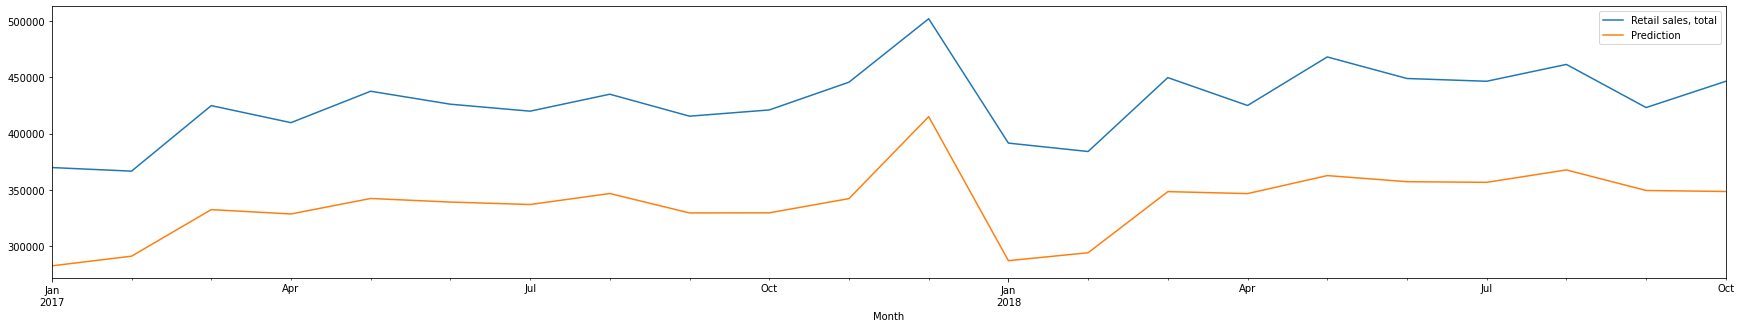

In [549]:
plt.pyplot.figure(figsize = (20, 5))
Retail_sales_total_validate.plot()
plt.pyplot.show()

Compute the absolute difference between actual sales with forecasted sales

In [550]:
Retail_sales_total_validate['Abs Diff'] = (Retail_sales_total_validate['Retail sales, total'] - Retail_sales_total_validate['Prediction']).abs()
Retail_sales_total_validate['Abs Diff %'] = (Retail_sales_total_validate['Retail sales, total'] - Retail_sales_total_validate['Prediction']).abs()/Retail_sales_total_validate['Retail sales, total']
Retail_sales_total_validate.loc['Average Abs Diff %'] = pd.Series(Retail_sales_total_validate['Abs Diff %'].mean(), index = ['Abs Diff %'])
Retail_sales_total_validate.loc['Min Abs Diff %'] = pd.Series(Retail_sales_total_validate['Abs Diff %'].min(), index = ['Abs Diff %'])
Retail_sales_total_validate.loc['Max Abs Diff %'] = pd.Series(Retail_sales_total_validate['Abs Diff %'].max(), index = ['Abs Diff %'])
Retail_sales_total_validate

,"Retail sales, total",Prediction,Abs Diff,Abs Diff %
Month,,,,
2017-01-01 00:00:00,369883.0,282662.282084,87220.717916,0.235806
2017-02-01 00:00:00,366697.0,291233.340297,75463.659703,0.205793
2017-03-01 00:00:00,424836.0,332553.265829,92282.734171,0.217220
2017-04-01 00:00:00,409718.0,328701.803048,81016.196952,0.197736
2017-05-01 00:00:00,437604.0,342438.469393,95165.530607,0.217470
2017-06-01 00:00:00,426090.0,339264.294958,86825.705042,0.203773
2017-07-01 00:00:00,419913.0,337089.977531,82823.022469,0.197239
2017-08-01 00:00:00,434961.0,346850.877051,88110.122949,0.202570
2017-09-01 00:00:00,415471.0,329606.574189,85864.425811,0.206668


3.7.5.9. Compare all historical/actual sales with forecasted sales

Filter the actual/historical sales to periods when there is no forecasted sales data and when there is forecasted sales data.

In [476]:
Retail_sales_total = monthly_retail_data.filter(items=['Retail sales, total'])
Retail_sales_total_1 = Retail_sales_total.loc['2005-01-01':'2016-12-01']
Retail_sales_total_2 = Retail_sales_total.loc['2017-01-01':]

Predict 48 months of sales using newly generated model.

In [477]:
pred_list = []

batch = Retail_sales_total_train_scaled[-n_inputs:].reshape((1, n_inputs, n_features))

for i in range(n_predict_predict):
    pred_list.append(Retail_sales_total_model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

In [478]:
Retail_sales_total_forecast_all = pd.DataFrame(scaler.inverse_transform(pred_list), index = Retail_sales_total_2[-n_predict_predict:].index, columns = ['Prediction'])

Convert the scaled numbers back to sales numbers.

In [479]:
Retail_sales_total_forecast_all


,Prediction
Month,
2017-01-01,356756.502482
2017-02-01,368689.534642
2017-03-01,414597.842804
2017-04-01,405680.469750
2017-05-01,421056.455425
2017-06-01,415677.720594
2017-07-01,413396.209575
2017-08-01,424026.691247
2017-09-01,403712.083586


Join actual/historical sales data with forecast sales data

In [480]:
Retail_sales_total_validate_all = pd.DataFrame(Retail_sales_total_forecast_all, index = Retail_sales_total_2.index, columns=['Prediction'])
Retail_sales_total_validate_all = pd.concat([Retail_sales_total_2, Retail_sales_total_validate_all], axis=1)
Retail_sales_total_validate_all = Retail_sales_total_1.append(Retail_sales_total_validate_all, sort=True)

Plot all data, including both actual/historical sales data with forecast sales data

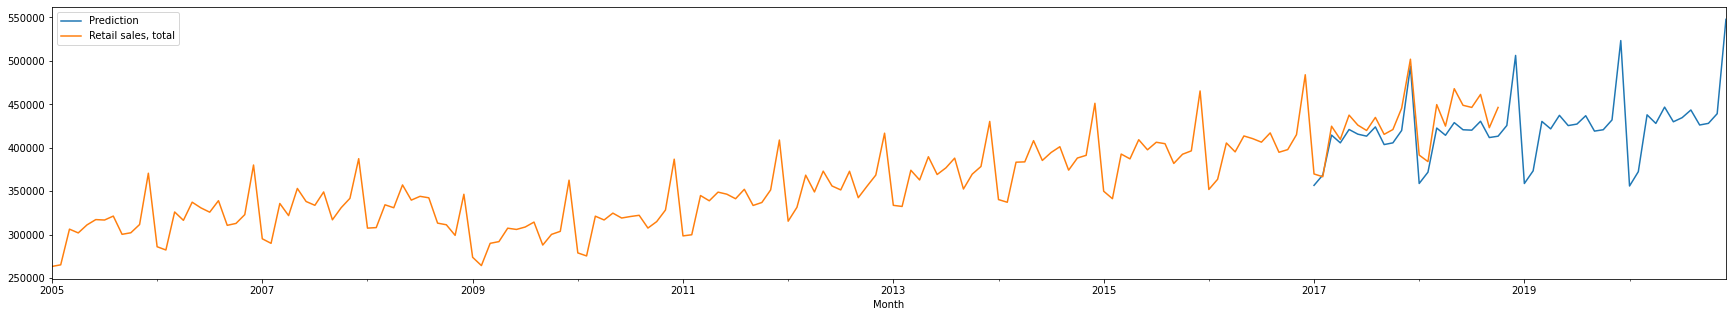

In [481]:
Retail_sales_total_validate_all.plot()
plt.pyplot.show()

##### 3.7.6. Retail sales, total (excl. motor vehicle and parts dealers)

3.7.6.1. Filter Monthly Retail Data to just Retail sales, total (excl. motor vehicle and parts dealers)

In [482]:
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_data = monthly_retail_actuals.filter(items=['Retail sales, total (excl. motor vehicle and parts dealers)'])
print('All: ', Retail_sales_total_excl_motor_vehicle_and_parts_dealers_data.shape)

All:  (166, 1)


3.7.6.2. Split the data into Train and Test data

We will be diving data into two sets of data:

* Train Data
* Test Data

Usually we use 70 Train/30 Test (70/30) split, 80 Train/20 Test (80/20) split, 90 Train/10 Test (90/10) split or even 95 Train/5 Test (95/5) where train data is used to create a forecast and test data is used to validate the forecast, but for simplification purposes, we will split the data as follows:

* Train Data: January 2005 thru December 2016
* Test Data: January 2017 thru October 2018

In [483]:
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_train = Retail_sales_total_excl_motor_vehicle_and_parts_dealers_data.loc['2005-01-01':'2016-12-01']
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_test = Retail_sales_total_excl_motor_vehicle_and_parts_dealers_data.loc['2017-01-01':]

Validate data split was done correctly

In [484]:
print( 'Train: ', Retail_sales_total_excl_motor_vehicle_and_parts_dealers_train.shape)
print( 'Test: ', Retail_sales_total_excl_motor_vehicle_and_parts_dealers_test.shape)

Train:  (144, 1)
Test:  (22, 1)


3.7.6.3. Tranform data from real number to range of numbers between 0 and 1.

Many machine learning algorithms, such as neural networks, regression-based algorithms, K-nearest neighbors, support vector machines with radial bias kernel functions, principal components analysis, and algorithms using linear discriminant analysis don't perform as well if the features are not on relatively similar scales.

Tip:

* Use MinMaxScaler as your default
* Use RobustScaler if you have outliers and can handle a larger range
* Use StandardScaler if you need normalized features
* Use Normalizer sparingly - it normalizes rows, not columns

In [485]:
scaler = MinMaxScaler()
scaler.fit(Retail_sales_total_excl_motor_vehicle_and_parts_dealers_train)
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_train_scaled = scaler.transform(Retail_sales_total_excl_motor_vehicle_and_parts_dealers_train)
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_test_scaled = scaler.transform(Retail_sales_total_excl_motor_vehicle_and_parts_dealers_test)

Validate scaling was done correctly

Please note that all values are between 0 and 1.

In [486]:
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_train_scaled

array([[0.01707202],
       [0.        ],
       [0.14812332],
       [0.14060904],
       [0.18699218],
       [0.18175921],
       [0.1665144 ],
       [0.22604484],
       [0.17651543],
       [0.21755748],
       [0.26216206],
       [0.54972673],
       [0.11914737],
       [0.08968489],
       [0.24339797],
       [0.22689357],
       [0.31084814],
       [0.28040718],
       [0.25213941],
       [0.31237262],
       [0.21299485],
       [0.23913807],
       [0.30923176],
       [0.59907774],
       [0.16393035],
       [0.12064482],
       [0.29034874],
       [0.25051762],
       [0.37648731],
       [0.32430358],
       [0.30458804],
       [0.35778269],
       [0.24489002],
       [0.31482693],
       [0.41155038],
       [0.64886123],
       [0.23439164],
       [0.22037939],
       [0.32126002],
       [0.31836243],
       [0.44747839],
       [0.38916429],
       [0.41142604],
       [0.40216022],
       [0.29432212],
       [0.31365924],
       [0.28649969],
       [0.517

3.7.6.4. Set parameter values

It is easier to change parameter values in one place, so you can track changes to parameter values and its respective model performance.

In [551]:
#Results = 0.039875
#n_inputs = 12
#n_features = 1
#n_batch_size = 1
#n_epochs = 100
#n_units = 400
#n_dropouts = 0.1
#n_predict_validate = 22
#n_predict_predict = 48

In [552]:
#Results = 0.075200
#n_inputs = 12
#n_features = 1
#n_batch_size = 1
#n_epochs = 100
#n_units = 400
#n_dropouts = 0.2
#n_predict_validate = 22
#n_predict_predict = 48

In [561]:
#Results = 0.032314
#n_inputs = 12
#n_features = 1
#n_batch_size = 2
#n_epochs = 100
#n_units = 400
#n_dropouts = 0.2
#n_predict_validate = 22
#n_predict_predict = 48

In [570]:
#Results = 0.029459
#n_inputs = 12
#n_features = 1
#n_batch_size = 3
#n_epochs = 100
#n_units = 400
#n_dropouts = 0.2
#n_predict_validate = 22
#n_predict_predict = 48

In [579]:
#Results = 0.041512
#n_inputs = 12
#n_features = 1
#n_batch_size = 4
#n_epochs = 100
#n_units = 400
#n_dropouts = 0.2
#n_predict_validate = 22
#n_predict_predict = 48

In [588]:
#Results = 0.079221
#n_inputs = 12
#n_features = 1
#n_batch_size = 3
#n_epochs = 100
#n_units = 400
#n_dropouts = 0.15
#n_predict_validate = 22
#n_predict_predict = 48

In [597]:
#Results = 0.067837
#n_inputs = 12
#n_features = 1
#n_batch_size = 3
#n_epochs = 100
#n_units = 200
#n_dropouts = 0.2
#n_predict_validate = 22
#n_predict_predict = 48

In [618]:
#Results = 0.036857
n_inputs = 12
n_features = 1
n_batch_size = 3
n_epochs = 100
n_units = 400
n_dropouts = 0.2
n_predict_validate = 22
n_predict_predict = 48

3.7.6.5. Generate input data for the model

Time series data requires preparation before it can be used to train a supervised learning model, such as a deep learning model.

In [619]:
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_generator = TimeseriesGenerator(Retail_sales_total_excl_motor_vehicle_and_parts_dealers_train_scaled, Retail_sales_total_excl_motor_vehicle_and_parts_dealers_train_scaled, length = n_inputs, batch_size = n_batch_size)

3.7.6.6. Develop Model

Please note that the following step takes some time to complete, especially you increase the n_epochs value.

In [620]:
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_model = Sequential()
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_model.add(LSTM(n_units, activation='relu', input_shape=(n_inputs, n_features)))
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_model.add(Dropout(n_dropouts))
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_model.add(Dense(1))
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_model.compile(optimizer='adam', loss='mse')

Retail_sales_total_excl_motor_vehicle_and_parts_dealers_model.fit_generator(Retail_sales_total_excl_motor_vehicle_and_parts_dealers_generator, epochs=n_epochs)

Epoch 1/100
44/44 [==============================] - 1s 16ms/step - loss: 0.0344
Epoch 2/100
44/44 [==============================] - 1s 15ms/step - loss: 0.0195
Epoch 3/100
44/44 [==============================] - 1s 15ms/step - loss: 0.0159
Epoch 4/100
44/44 [==============================] - 1s 15ms/step - loss: 0.0123
Epoch 5/100
44/44 [==============================] - 1s 14ms/step - loss: 0.0129
Epoch 6/100
44/44 [==============================] - 1s 14ms/step - loss: 0.0096
Epoch 7/100
44/44 [==============================] - 1s 15ms/step - loss: 0.0137
Epoch 8/100
44/44 [==============================] - 1s 14ms/step - loss: 0.0134
Epoch 9/100
44/44 [==============================] - 1s 15ms/step - loss: 0.0097
Epoch 10/100
44/44 [==============================] - 1s 14ms/step - loss: 0.0056
Epoch 11/100
44/44 [==============================] - 1s 15ms/step - loss: 0.0072
Epoch 12/100
44/44 [==============================] - 1s 15ms/step - loss: 0.0060
Epoch 13/100
44/44 [=====

3.7.6.7. Predict using Model

Predict 22 months of sales using newly generated model.

In [621]:
pred_list = []

batch = Retail_sales_total_excl_motor_vehicle_and_parts_dealers_train_scaled[-n_inputs:].reshape((1, n_inputs, n_features))

for i in range(n_predict_validate):
    pred_list.append(Retail_sales_total_excl_motor_vehicle_and_parts_dealers_model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

Convert the scaled numbers back to sales numbers.

In [622]:
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index = Retail_sales_total_excl_motor_vehicle_and_parts_dealers_test[-n_predict_validate:].index, columns = ['Prediction'])

3.7.6.8. Validate Model

Join test data with 22 months of sales number with predicted data with 22 months of predicted sales number.

In [623]:
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate = pd.concat([Retail_sales_total_excl_motor_vehicle_and_parts_dealers_test, Retail_sales_total_excl_motor_vehicle_and_parts_dealers_predict], axis = 1)

In [624]:
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate

,"Retail sales, total (excl. motor vehicle and parts dealers)",Prediction
Month,,
2017-01-01,284852.0,276939.692824
2017-02-01,277264.0,281182.342879
2017-03-01,318269.0,310424.808563
2017-04-01,311848.0,304516.253882
2017-05-01,331234.0,321198.332883
2017-06-01,322575.0,319454.459831
2017-07-01,316827.0,313911.915176
2017-08-01,329302.0,320527.329202
2017-09-01,314688.0,306536.806523


Plot the difference in actual sales with forecast sales

<Figure size 1440x360 with 0 Axes>

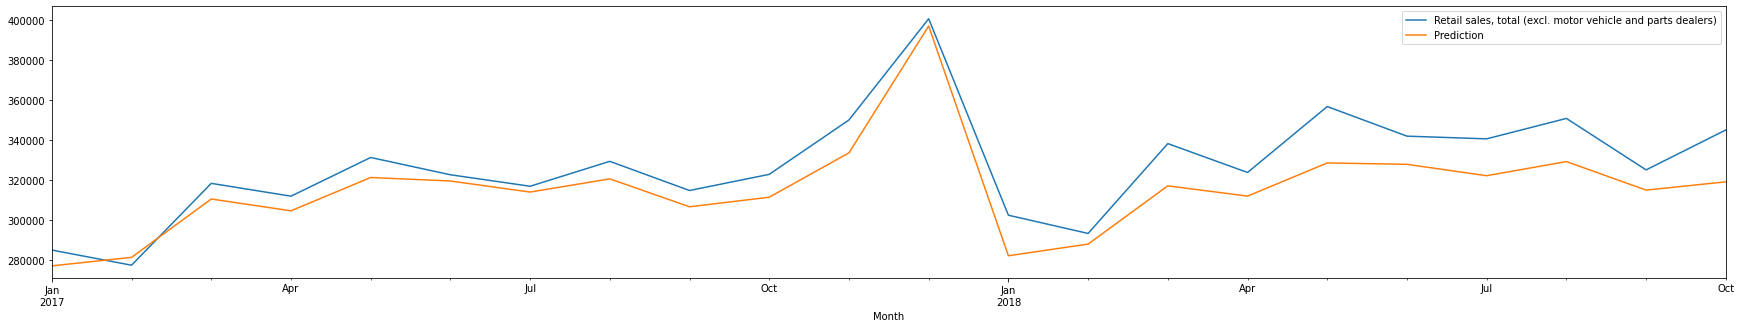

In [625]:
plt.pyplot.figure(figsize = (20, 5))
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate.plot()
plt.pyplot.show()

Compute the absolute difference between actual sales with forecasted sales

In [626]:
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate['Abs Diff'] = (Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate['Retail sales, total (excl. motor vehicle and parts dealers)'] - Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate['Prediction']).abs()
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate['Abs Diff %'] = (Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate['Retail sales, total (excl. motor vehicle and parts dealers)'] - Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate['Prediction']).abs()/Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate['Retail sales, total (excl. motor vehicle and parts dealers)']
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate.loc['Average Abs Diff %'] = pd.Series(Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate['Abs Diff %'].mean(), index = ['Abs Diff %'])
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate.loc['Min Abs Diff %'] = pd.Series(Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate['Abs Diff %'].min(), index = ['Abs Diff %'])
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate.loc['Max Abs Diff %'] = pd.Series(Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate['Abs Diff %'].max(), index = ['Abs Diff %'])
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate

,"Retail sales, total (excl. motor vehicle and parts dealers)",Prediction,Abs Diff,Abs Diff %
Month,,,,
2017-01-01 00:00:00,284852.0,276939.692824,7912.307176,0.027777
2017-02-01 00:00:00,277264.0,281182.342879,3918.342879,0.014132
2017-03-01 00:00:00,318269.0,310424.808563,7844.191437,0.024646
2017-04-01 00:00:00,311848.0,304516.253882,7331.746118,0.023511
2017-05-01 00:00:00,331234.0,321198.332883,10035.667117,0.030298
2017-06-01 00:00:00,322575.0,319454.459831,3120.540169,0.009674
2017-07-01 00:00:00,316827.0,313911.915176,2915.084824,0.009201
2017-08-01 00:00:00,329302.0,320527.329202,8774.670798,0.026646
2017-09-01 00:00:00,314688.0,306536.806523,8151.193477,0.025902


3.7.6.9. Compare all historical/actual sales with forecasted sales

Filter the actual/historical sales to periods when there is no forecasted sales data and when there is forecasted sales data.

In [498]:
Retail_sales_total_excl_motor_vehicle_and_parts_dealers = monthly_retail_data.filter(items=['Retail sales, total (excl. motor vehicle and parts dealers)'])
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_1 = Retail_sales_total_excl_motor_vehicle_and_parts_dealers.loc['2005-01-01':'2016-12-01']
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_2 = Retail_sales_total_excl_motor_vehicle_and_parts_dealers.loc['2017-01-01':]

Predict 48 months of sales using newly generated model.

In [499]:
pred_list = []

batch = Retail_sales_total_excl_motor_vehicle_and_parts_dealers_train_scaled[-n_inputs:].reshape((1, n_inputs, n_features))

for i in range(n_predict_predict):
    pred_list.append(Retail_sales_total_excl_motor_vehicle_and_parts_dealers_model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)

In [500]:
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_forecast_all = pd.DataFrame(scaler.inverse_transform(pred_list), index = Retail_sales_total_excl_motor_vehicle_and_parts_dealers_2[-n_predict_predict:].index, columns = ['Prediction'])

In [501]:
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_forecast_all

,Prediction
Month,
2017-01-01,277846.101286
2017-02-01,275091.990502
2017-03-01,312137.831632
2017-04-01,306046.712967
2017-05-01,317736.012104
2017-06-01,318111.846053
2017-07-01,314838.583411
2017-08-01,320849.192219
2017-09-01,309054.619443


Join actual/historical sales data with forecast sales data

In [502]:
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate_all = pd.DataFrame(Retail_sales_total_excl_motor_vehicle_and_parts_dealers_forecast_all, index = Retail_sales_total_excl_motor_vehicle_and_parts_dealers_2.index, columns=['Prediction'])
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate_all = pd.concat([Retail_sales_total_excl_motor_vehicle_and_parts_dealers_2, Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate_all], axis=1)
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate_all = Retail_sales_total_excl_motor_vehicle_and_parts_dealers_1.append(Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate_all, sort=True)

Plot all data, including both actual/historical sales data with forecast sales data

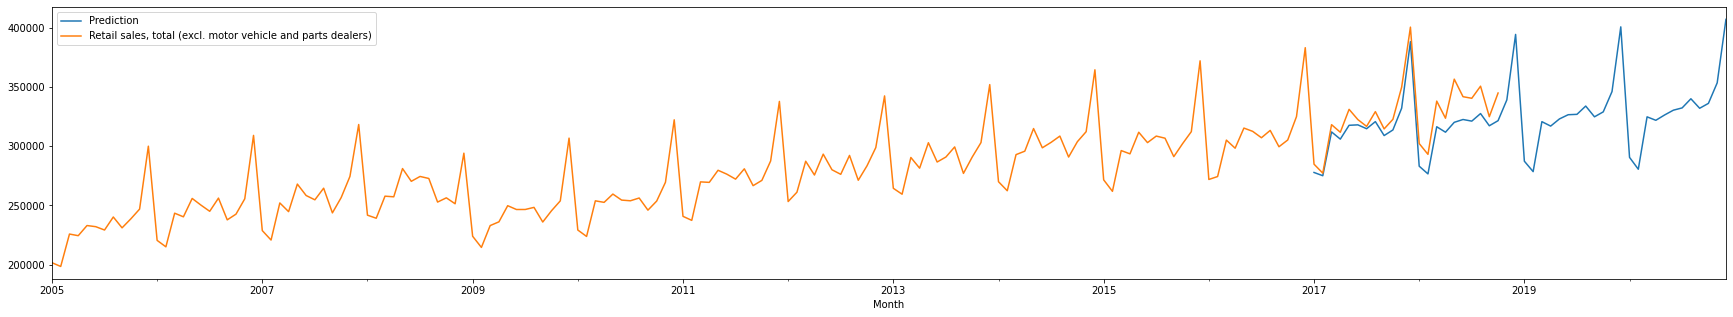

In [503]:
Retail_sales_total_excl_motor_vehicle_and_parts_dealers_validate_all.plot()
plt.pyplot.show()

Convert the scaled numbers back to sales numbers.

#### 3.8. Maintain Forecast Model

Like everything, newly created forecast needs to be maintained.  More likely on a monthly basis since this is monthly forecast, forecast needs to be updated to reflect revised trend.

To revise the forecast to reflect more up to date data, follow the steps above where you will revise step 3.7.

When diving data into two sets of data:
- Train Data: January 2005 thru January 2017 (+ 1 month)
- Test Data: February 2017 (+ 1 month) thru November 2018 (+ 1 month)

Repeat the process for all subsequent months.

### I hope you have enjoyed this tutorial. If you have any questions or comments, please provide them here.